# TEST YPD 

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Import BASE_ID dataset

In [2]:
#Import BASE_ID dataset
base_id=pd.read_csv('BASE_ID.txt', sep="\\t", engine="python", index_col=0,parse_dates=[1]) 

In [3]:
#Print the information of the dataset
print("\nDataset information")
base_id.info()


Dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1,00 to 2500,00
Data columns (total 7 columns):
FECHA_ALTA           2500 non-null object
FECHA_NACIMIENTO     2500 non-null object
SEXO                 2500 non-null object
ESTADO_CIVIL         2482 non-null object
SITUACION_LABORAL    2500 non-null object
fuga                 722 non-null float64
MES_DE_FUGA          722 non-null float64
dtypes: float64(2), object(5)
memory usage: 97.7+ KB


In [4]:
#Missing values on dataset by colums
print("\nMissing values")
print(base_id.isna().sum())


Missing values
FECHA_ALTA              0
FECHA_NACIMIENTO        0
SEXO                    0
ESTADO_CIVIL           18
SITUACION_LABORAL       0
fuga                 1778
MES_DE_FUGA          1778
dtype: int64


In [5]:
#Modifying SEXO column

#You con uncomment the next line to see all values on SEXO column
#print("SEXO column values: ", set(base_id["SEXO"]))

#Females are 'F'
base_id=base_id.replace({"SEXO":["FEMENINO","MUJER","Mujer","femenino","mujer"]},"F")
#Males are 'M'
base_id=base_id.replace({"SEXO":["HOMBRE","Hombre","Masc.","masculino","varÃ³n"]},"M") 

In [6]:
#Modifying ESTADO_CIVIL column

#You con uncomment the next line to see all values on ESTADO_CIVIL column
#print("ESTADO_CIVIL column values: ", set(base_id["ESTADO_CIVIL"]))

#Replace nan values on ESTADO_CIVIL column by the value with biggest frequency
base_id=base_id.fillna({"ESTADO_CIVIL":base_id["ESTADO_CIVIL"].value_counts().index[0]})

In [7]:
#Modifying FUGA column

#You con uncomment the next line to see all values on fuga column
#print("fuga column values: ", set(base_id["fuga"]))

#Replace nan values on fuga column by 0
base_id=base_id.fillna({"fuga":0})

#Rename from fuga to FUGA
base_id=base_id.rename(index=str, columns={"fuga": "FUGA"})

In [8]:
#Modifying MES_DE_FUGA column

#You con uncomment the next line to see all values on MES_DE_FUGA column
#print("fuga column values: ", set(base_id["MES_DE_FUGA"]))

#Replace nan values on MES_DE_FUGA column by 0
base_id=base_id.fillna({"MES_DE_FUGA":0})

In [9]:
from datetime import date
#Modifying FECHA_ALTA column

#Dictionary for months
meses={"ene":"01","feb":"02","mar":"03","abr":"04","may":"05","jun":"06"
       ,"jul":"07","ago":"08","sep":"09","oct":"10","nov":"11","dic":"12"}

#Split values in FECHA_ALTA column and becomes a value on format dd/mm/YYYY
dates=[]
for value in base_id["FECHA_ALTA"] :
        d=int(value[3:5])
        m=int(meses[value[0:3]])
        
        if d==29 and m==2:
            d=d-1
        dates.append(date(int(value[5:]),m,d))
    

#Update the values on FECHA_ALTA column 
base_id["FECHA_ALTA"]=dates

#Convert FECHA_ALTA column data type from object to datetime 
base_id["FECHA_ALTA"]=pd.to_datetime(base_id["FECHA_ALTA"],errors="raise")


In [10]:
#Split values in FECHA_NACIMIENTO column and becomes a value on format dd/mm/YYYY
dates=[]
for value in base_id["FECHA_NACIMIENTO"] :
    if value!="0001-01-01":
        d=int(value[6:])
        m=int(value[4:6])
        if d==29 and m==2:
            d=d-1
        dates.append(date(int(value[0:4]),m,d))
    else:
        dates.append(0)

#Update the values on FECHA_NACIMIENTO column 
base_id["FECHA_NACIMIENTO"]=dates

#Convert FECHA_NACIMIENTO column data type from object to datetime 
base_id["FECHA_NACIMIENTO"]=pd.to_datetime(base_id["FECHA_NACIMIENTO"],errors="coerce")


#Replace nan values on FECHA_NACIMIENTO column by the year mean.
base_id=base_id.fillna({"FECHA_NACIMIENTO":date(int(base_id["FECHA_NACIMIENTO"].dt.year.mean()),1,1)})

#Convert FECHA_NACIMIENTO column data type from object to datetime 
base_id["FECHA_NACIMIENTO"]=pd.to_datetime(base_id["FECHA_NACIMIENTO"],errors="raise")

In [11]:
#Modifying SITUACION_LABORAL column

#You con uncomment the next line to see all values on SITUACION_LABORAL column
#print("SITUACION_LABORAL column values: ", set(base_id["SITUACION_LABORAL"]))

#Replace for 'DESCONOCIDO'
base_id=base_id.replace({"SITUACION_LABORAL":[" desconocido"," desconocido   "]},"DESCONOCIDO")
#Replace for 'CONTRATO AUTONOMO'
base_id=base_id.replace({"SITUACION_LABORAL":["contrato autonomo."]},"CONTRATO AUTONOMO") 
#Replace for CONTRATO FIJO'
base_id=base_id.replace({"SITUACION_LABORAL":["Contrato fijo"]},"CONTRATO FIJO") 
#Replace for 'OTROS'
base_id=base_id.replace({"SITUACION_LABORAL":["otros"]},"OTROS") 
#Replace for 'CONTRATO TEMPORAL'
base_id=base_id.replace({"SITUACION_LABORAL":["temporal","temporal     "]},"CONTRATO TEMPORAL") 

In [12]:
base_id.head(5)

,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA
CLIENTE_CC,,,,,,,
"1,00",1996-09-30,1930-08-23,F,CASADO,OTROS,1.0,2.0
"2,00",1986-05-01,1953-06-30,M,UNION LIBRE,CONTRATO FIJO,0.0,0.0
"3,00",1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0
"4,00",1997-08-27,1939-05-03,M,CASADO,OTROS,0.0,0.0
"5,00",1997-07-21,1931-10-13,F,CASADO,CONTRATO AUTONOMO,0.0,0.0


# Plotting BASE_ID dataset

M    1250
F    1250
Name: SEXO, dtype: int64


Text(0.5,1,'Nro. de hombres y mujeres')

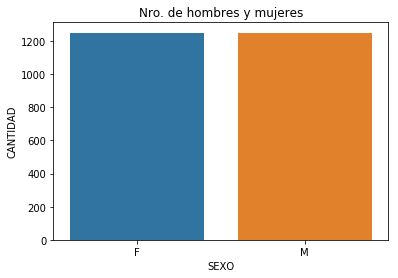

In [13]:
print(base_id["SEXO"].value_counts())
sns.countplot(base_id["SEXO"])
plt.ylabel("CANTIDAD")
plt.title("Nro. de hombres y mujeres")

Text(0.5,1,'Cantidad de Hombres y mujeres Vs. Situación laboral')

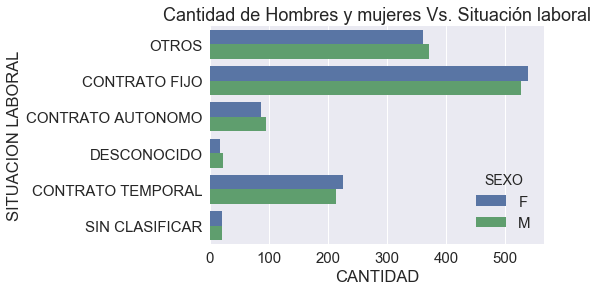

In [14]:
#Set font size
sns.set(font_scale=1.5)

sns.countplot(y=base_id["SITUACION_LABORAL"],hue=base_id["SEXO"])
plt.xlabel("CANTIDAD")
plt.ylabel("SITUACION LABORAL")
plt.title("Cantidad de Hombres y mujeres Vs. Situación laboral")

Text(0.5,1,'Cantidad de clientes por situación laboral Vs. Fuga')

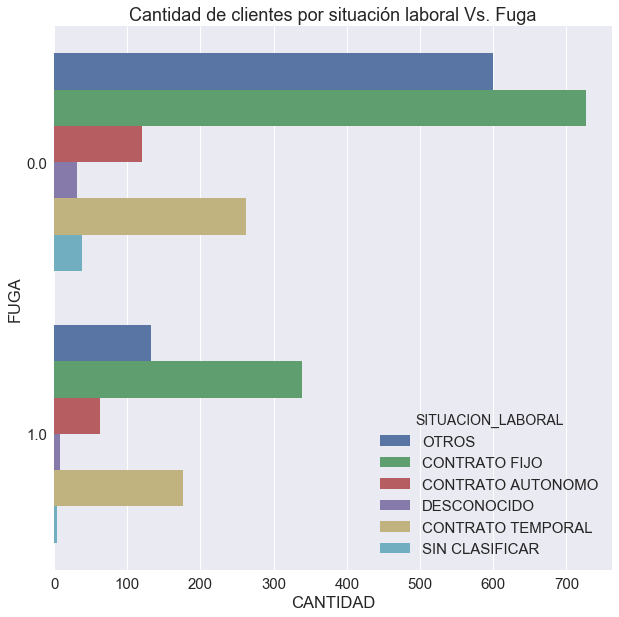

In [15]:
#Set font size
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.countplot(y=base_id["FUGA"],hue=base_id["SITUACION_LABORAL"])
plt.xlabel("CANTIDAD")
plt.title("Cantidad de clientes por situación laboral Vs. Fuga")

Text(0.5,1,'Cantidad de clientes por estado civil Vs. Fuga')

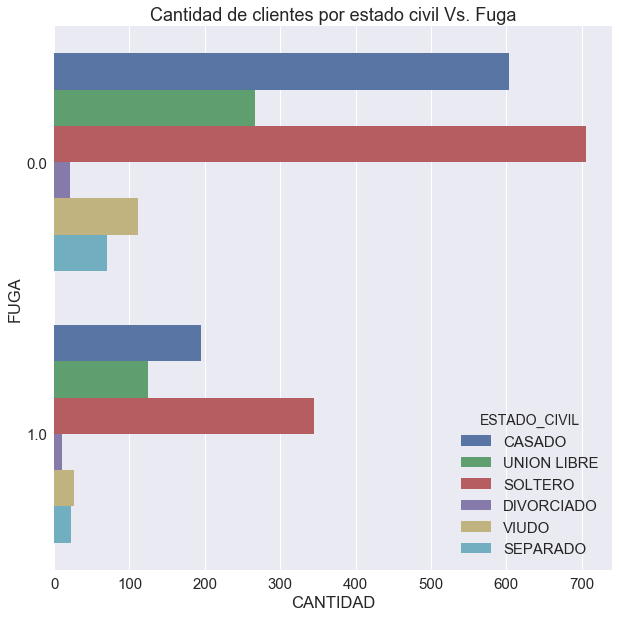

In [16]:
#Set font size
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.countplot(y=base_id["FUGA"],hue=base_id["ESTADO_CIVIL"])
plt.xlabel("CANTIDAD")
plt.title("Cantidad de clientes por estado civil Vs. Fuga")

Text(0.5,0,'CANTIDAD')

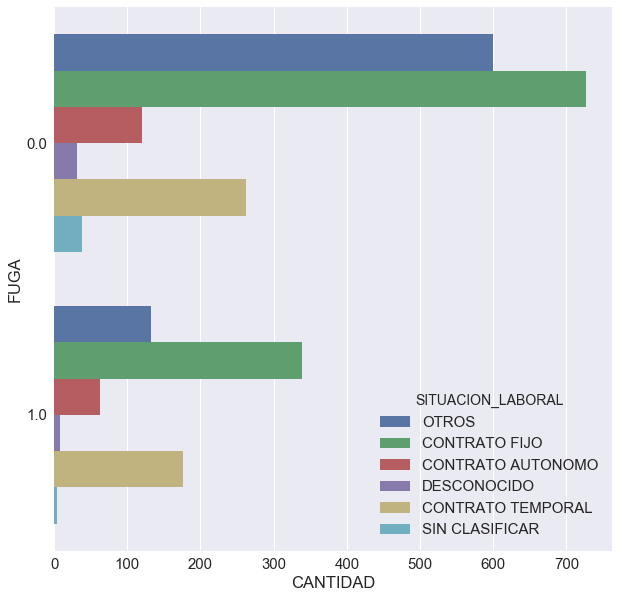

In [17]:
#Set font size
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.countplot(y=base_id["FUGA"],hue=base_id["SITUACION_LABORAL"])
plt.xlabel("CANTIDAD")

    index  percentage
2     1.0   10.526316
3     2.0    9.418283
0     3.0   11.772853
5     4.0    8.033241
10    5.0    5.955679
9     6.0    6.371191
4     7.0    8.725762
7     8.0    7.894737
11    9.0    5.401662
8    10.0    6.648199
1    11.0   11.218837
6    12.0    8.033241


Text(0.5,1,'Porcentaje de fugas por mes')

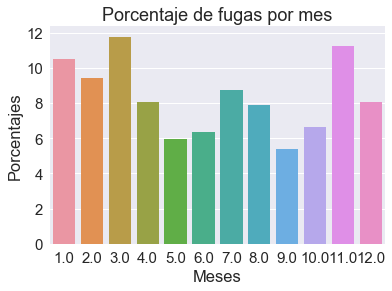

In [107]:
info=base_id["MES_DE_FUGA"].iloc[base_id["MES_DE_FUGA"].nonzero()[0]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values("index")
print(info)
sns.barplot(x="index", y="percentage", data=info)
plt.ylabel("Porcentajes")
plt.xlabel("Meses")
plt.title("Porcentaje de fugas por mes")

# Transform base_id data_set to improve exploratory analysis

In [19]:
#base_id_transf is a dataframe whit a copy of the base_id data.
base_id_transf=base_id
#Split 'FECHA_ALTA' column in 3 columns: ANIO_ALTA, MES_ALTA,DIA_ALTA
date=base_id_transf["FECHA_ALTA"]
base_id_transf["ANIO_ALTA"],base_id_transf["MES_ALTA"],base_id_transf["DIA_ALTA"] = date.dt.year, date.dt.month, date.dt.day
base_id_transf.head(5)

,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA,ANIO_ALTA,MES_ALTA,DIA_ALTA
CLIENTE_CC,,,,,,,,,,
"1,00",1996-09-30,1930-08-23,F,CASADO,OTROS,1.0,2.0,1996,9,30
"2,00",1986-05-01,1953-06-30,M,UNION LIBRE,CONTRATO FIJO,0.0,0.0,1986,5,1
"3,00",1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,1994,12,1
"4,00",1997-08-27,1939-05-03,M,CASADO,OTROS,0.0,0.0,1997,8,27
"5,00",1997-07-21,1931-10-13,F,CASADO,CONTRATO AUTONOMO,0.0,0.0,1997,7,21


In [20]:
#Split 'FECHA_NACIMIENTO' column in 3 columns: ANIO_NACIMIENTO, MES_NACIMIENTO,DIA_NACIMIENTO
date=base_id_transf["FECHA_NACIMIENTO"]
base_id_transf["ANIO_NACIMIENTO"],base_id_transf["MES_NACIMIENTO"],base_id_transf["DIA_NACIMIENTO"] = date.dt.year, date.dt.month, date.dt.day
base_id_transf.head(5)

,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA,ANIO_ALTA,MES_ALTA,DIA_ALTA,ANIO_NACIMIENTO,MES_NACIMIENTO,DIA_NACIMIENTO
CLIENTE_CC,,,,,,,,,,,,,
"1,00",1996-09-30,1930-08-23,F,CASADO,OTROS,1.0,2.0,1996,9,30,1930,8,23
"2,00",1986-05-01,1953-06-30,M,UNION LIBRE,CONTRATO FIJO,0.0,0.0,1986,5,1,1953,6,30
"3,00",1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,1994,12,1,1954,7,21
"4,00",1997-08-27,1939-05-03,M,CASADO,OTROS,0.0,0.0,1997,8,27,1939,5,3
"5,00",1997-07-21,1931-10-13,F,CASADO,CONTRATO AUTONOMO,0.0,0.0,1997,7,21,1931,10,13


In [21]:
#Drop columns FECHA_ALTA and FECHA_NACIMIENTO
base_id_transf=base_id_transf.drop(columns=['FECHA_ALTA', 'FECHA_NACIMIENTO'])
base_id_transf.head(5)

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA,ANIO_ALTA,MES_ALTA,DIA_ALTA,ANIO_NACIMIENTO,MES_NACIMIENTO,DIA_NACIMIENTO
CLIENTE_CC,,,,,,,,,,,
"1,00",F,CASADO,OTROS,1.0,2.0,1996,9,30,1930,8,23
"2,00",M,UNION LIBRE,CONTRATO FIJO,0.0,0.0,1986,5,1,1953,6,30
"3,00",F,UNION LIBRE,OTROS,1.0,11.0,1994,12,1,1954,7,21
"4,00",M,CASADO,OTROS,0.0,0.0,1997,8,27,1939,5,3
"5,00",F,CASADO,CONTRATO AUTONOMO,0.0,0.0,1997,7,21,1931,10,13


In [22]:
base_id_transf=pd.get_dummies(base_id_transf, prefix=['SEXO', 'ESTADO_CIVIL','SITUACION_LABORAL'])
base_id_transf.info()
base_id_transf.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1,00 to 2500,00
Data columns (total 22 columns):
FUGA                                   2500 non-null float64
MES_DE_FUGA                            2500 non-null float64
ANIO_ALTA                              2500 non-null int64
MES_ALTA                               2500 non-null int64
DIA_ALTA                               2500 non-null int64
ANIO_NACIMIENTO                        2500 non-null int64
MES_NACIMIENTO                         2500 non-null int64
DIA_NACIMIENTO                         2500 non-null int64
SEXO_F                                 2500 non-null uint8
SEXO_M                                 2500 non-null uint8
ESTADO_CIVIL_CASADO                    2500 non-null uint8
ESTADO_CIVIL_DIVORCIADO                2500 non-null uint8
ESTADO_CIVIL_SEPARADO                  2500 non-null uint8
ESTADO_CIVIL_SOLTERO                   2500 non-null uint8
ESTADO_CIVIL_UNION LIBRE               2500 non-null uint8
EST

,FUGA,MES_DE_FUGA,ANIO_ALTA,MES_ALTA,DIA_ALTA,ANIO_NACIMIENTO,MES_NACIMIENTO,DIA_NACIMIENTO,SEXO_F,SEXO_M,...,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,SITUACION_LABORAL_CONTRATO AUTONOMO,SITUACION_LABORAL_CONTRATO FIJO,SITUACION_LABORAL_CONTRATO TEMPORAL,SITUACION_LABORAL_DESCONOCIDO,SITUACION_LABORAL_OTROS,SITUACION_LABORAL_SIN CLASIFICAR
CLIENTE_CC,,,,,,,,,,,,,,,,,,,,,
"1,00",1.0,2.0,1996,9,30,1930,8,23,1,0,...,0,0,0,0,0,0,0,0,1,0
"2,00",0.0,0.0,1986,5,1,1953,6,30,0,1,...,0,0,1,0,0,1,0,0,0,0
"3,00",1.0,11.0,1994,12,1,1954,7,21,1,0,...,0,0,1,0,0,0,0,0,1,0
"4,00",0.0,0.0,1997,8,27,1939,5,3,0,1,...,0,0,0,0,0,0,0,0,1,0
"5,00",0.0,0.0,1997,7,21,1931,10,13,1,0,...,0,0,0,0,1,0,0,0,0,0


# Plotting BASE_ID after transformation

FUGA                                   1.000000
MES_DE_FUGA                            0.823197
ANIO_NACIMIENTO                        0.167605
ANIO_ALTA                              0.129415
SITUACION_LABORAL_CONTRATO TEMPORAL    0.114942
ESTADO_CIVIL_SOLTERO                   0.074677
SITUACION_LABORAL_CONTRATO FIJO        0.056095
SITUACION_LABORAL_CONTRATO AUTONOMO    0.034393
MES_NACIMIENTO                         0.028698
ESTADO_CIVIL_UNION LIBRE               0.026921
SEXO_M                                 0.024713
DIA_NACIMIENTO                         0.015379
ESTADO_CIVIL_DIVORCIADO                0.008352
MES_ALTA                               0.000288
DIA_ALTA                              -0.002604
ESTADO_CIVIL_SEPARADO                 -0.021422
SEXO_F                                -0.024713
SITUACION_LABORAL_DESCONOCIDO         -0.024985
ESTADO_CIVIL_VIUDO                    -0.052608
SITUACION_LABORAL_SIN CLASIFICAR      -0.055829
ESTADO_CIVIL_CASADO                   -0

Text(0.5,1,'Matriz de correlacion conjunto de datos BASE_ID')

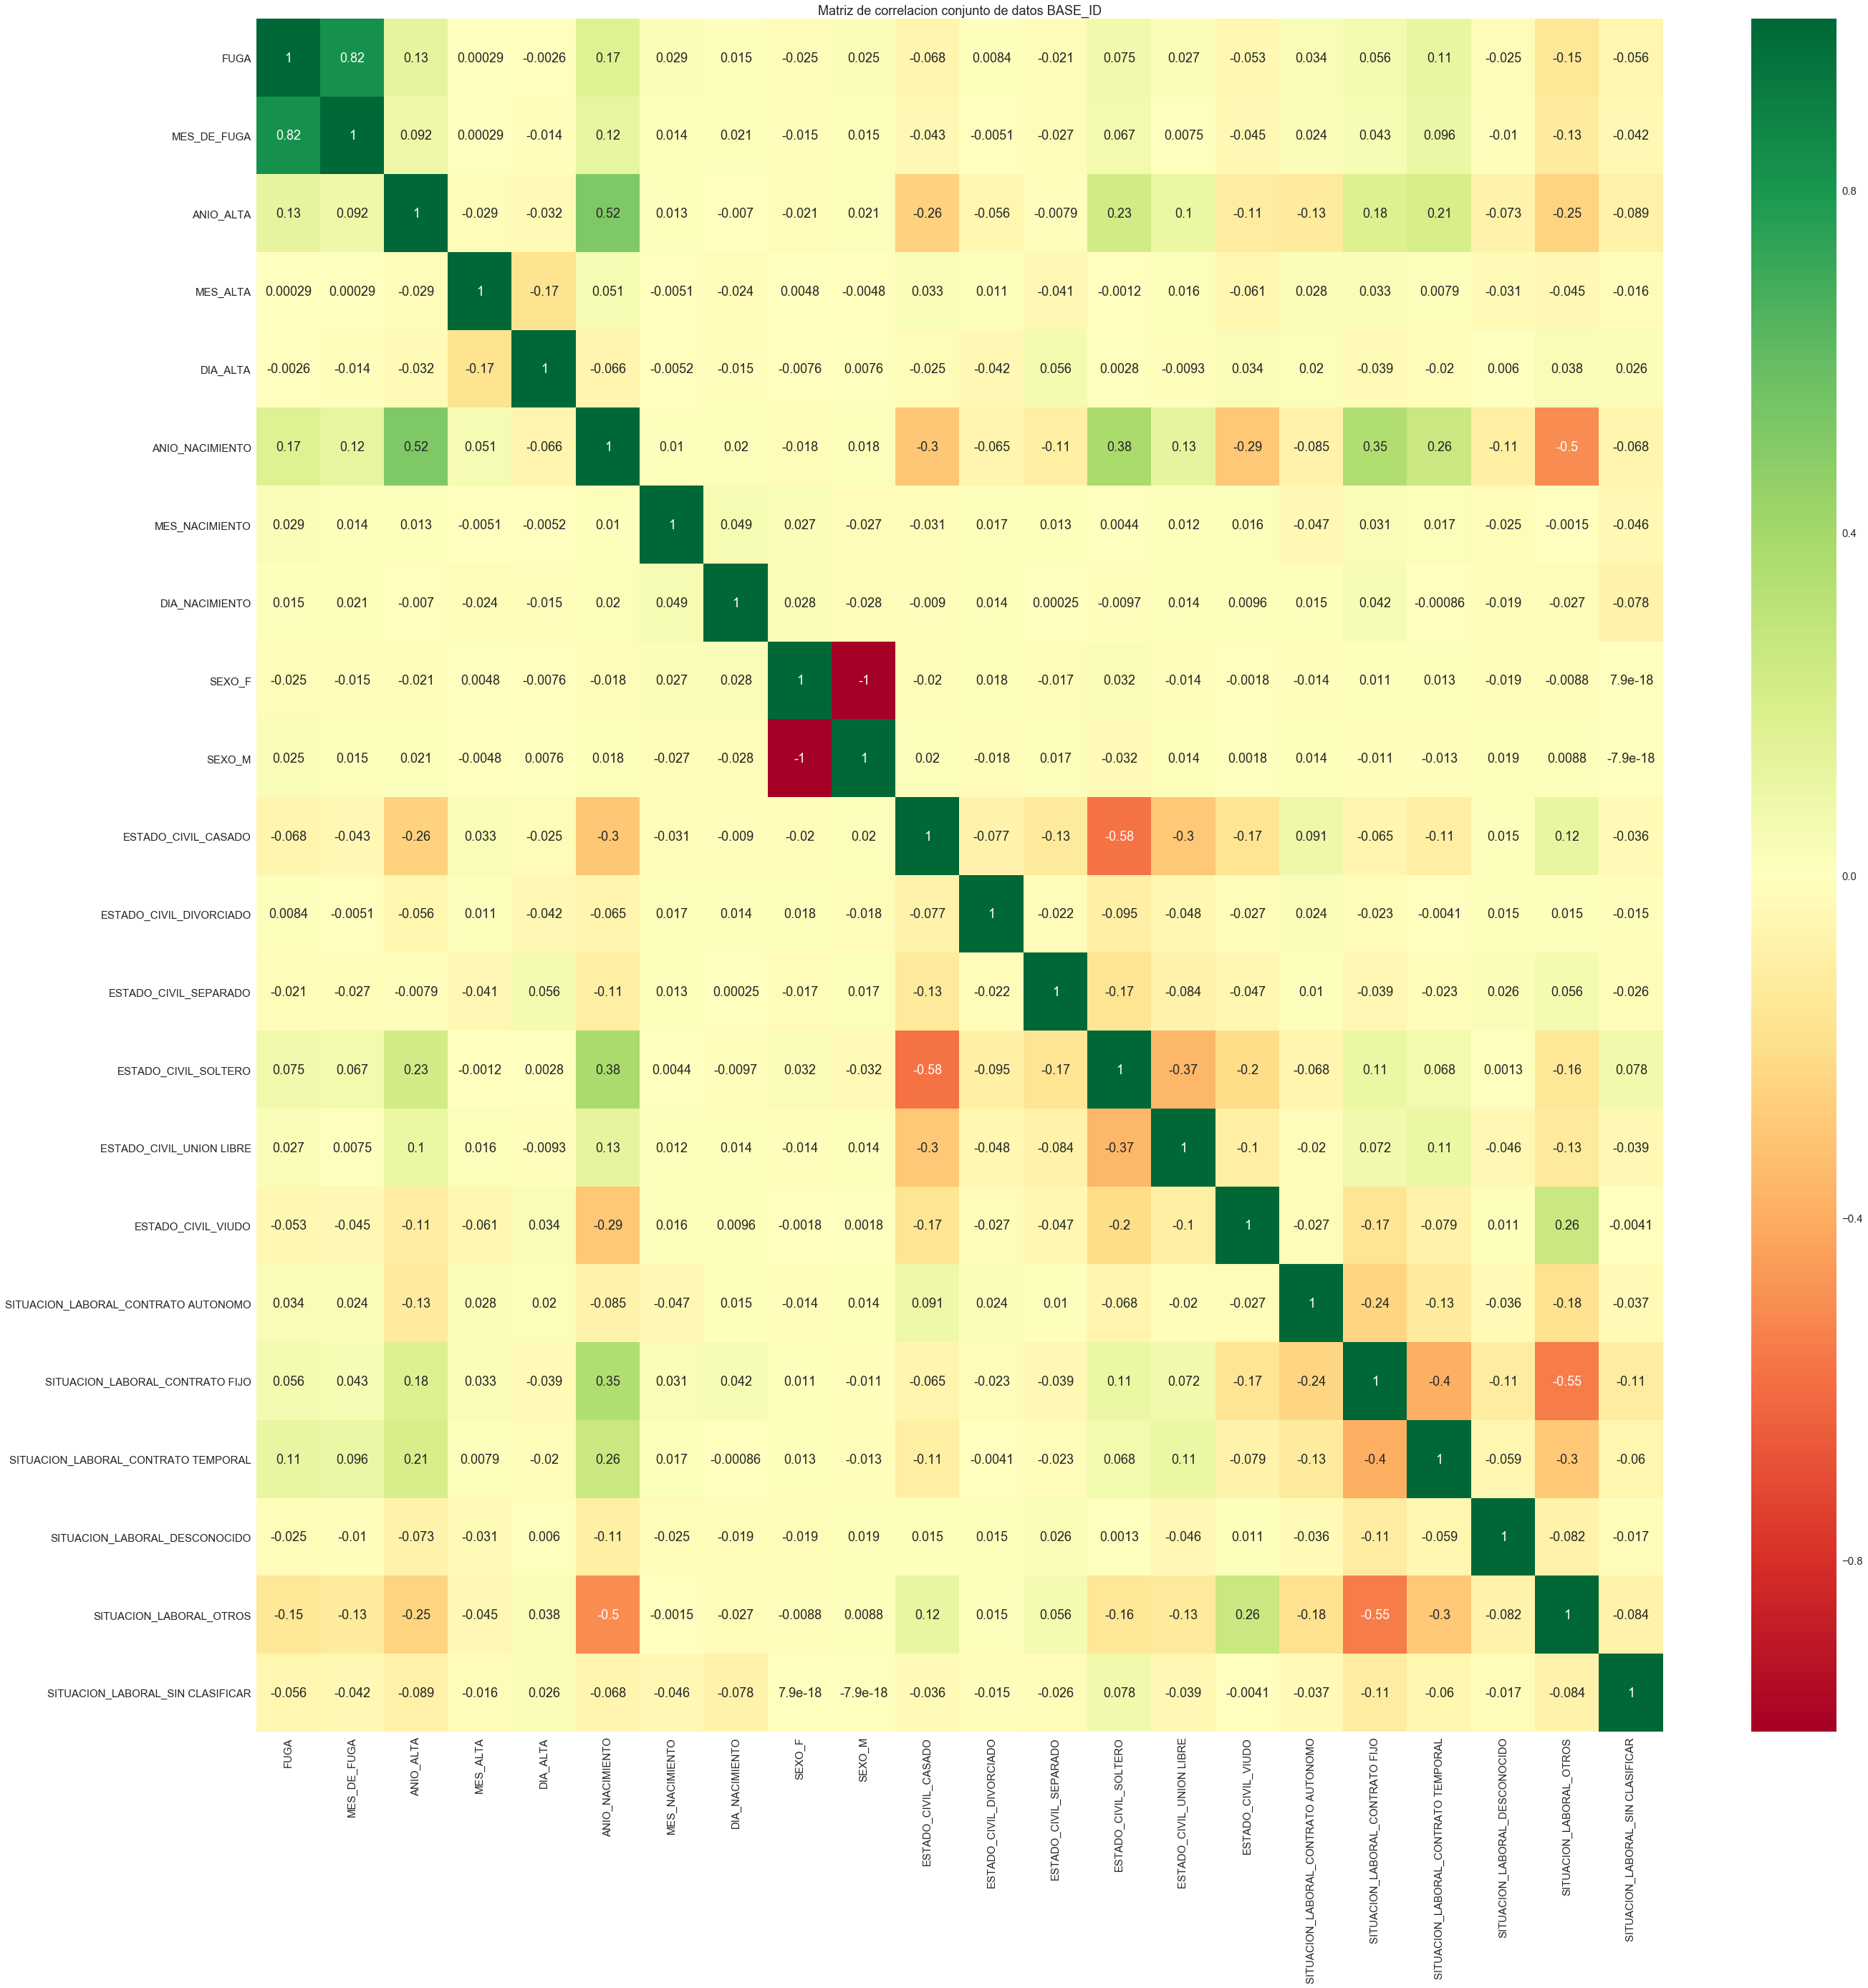

In [23]:
#Get correlations of each features in dataset
corrmat = base_id_transf.corr()
print(corrmat["FUGA"].sort_values(ascending=False))
top_corr_features = corrmat.index
plt.figure(figsize=(44,44))
#Plot heat map
sns.heatmap(base_id_transf[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Matriz de correlacion conjunto de datos BASE_ID")

Text(0.5,0,'CANTIDAD')

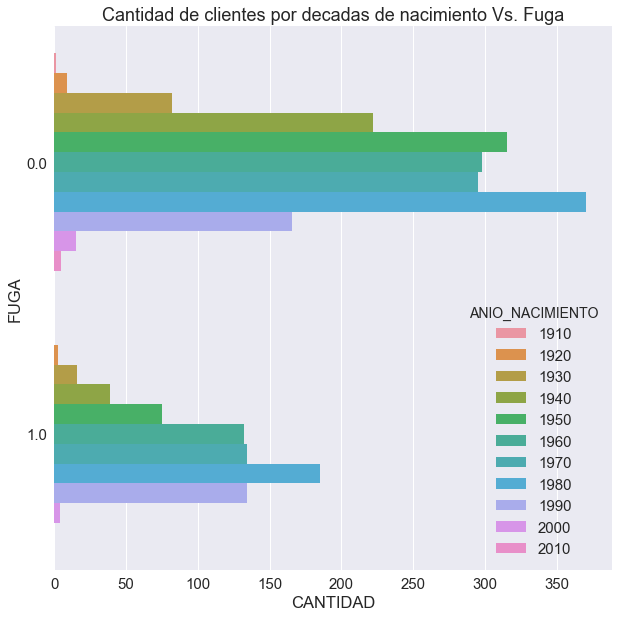

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(y=base_id["FUGA"],hue=10*(base_id["ANIO_NACIMIENTO"]//10))
plt.title("Cantidad de clientes por decadas de nacimiento Vs. Fuga")
plt.xlabel("CANTIDAD")

# Importing BASE_MOVIMIENTOS dataset

In [25]:
#Importing BASE_MOVIMIENTOS dataset

file = open("BASE_MOVIMIENTOS.txt", "r")
f=[]
for line in file.readlines():
    l=line.split(" ")
    l1=[]
    for i in l:
        if i!='' and i!='$':
            l1.append(i.replace("\n",""))
    f.append(l1)
column_names=f.pop(0)
base_mov=pd.DataFrame(f,columns=column_names)
base_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31440 entries, 0 to 31439
Data columns (total 15 columns):
ID                     31440 non-null object
FECHA_INFORMACION      31440 non-null object
SALDO_AHORROS          31440 non-null object
SALDO_FONDOS           31440 non-null object
SALDO_CREDITO1         31440 non-null object
SALDO_CREDITO2         31440 non-null object
SALDO_TARJETA          31440 non-null object
MONTO_COMPRAS1         31440 non-null object
MONTO_CAJERO1          31440 non-null object
MONTO_COMPRAS2         31440 non-null object
MONTO_CAJERO2          31440 non-null object
MONTO_ABONOS_NOMINA    31440 non-null object
INDICADOR_MORA         31440 non-null object
SALDO_ACTIVO           31440 non-null object
SALDO_PASIVO           31440 non-null object
dtypes: object(15)
memory usage: 1.8+ MB


In [26]:
#Modifying 'ID' column

#Changing data type from str to int
base_mov["ID"]=pd.to_numeric(base_mov["ID"])
base_mov["ID"].head(10)

#Making index the 'ID' column
#base_mov.set_index("ID")

0       3
1     171
2     313
3     644
4    1445
5    1835
6    2075
7     771
8     622
9     760
Name: ID, dtype: int64

In [27]:
#Modifying FECHA_INFORMACION column

#Dictionary for months
months={"JAN":"01","FEB":"02","MAR":"03","APR":"04","MAY":"05","JUN":"06"
       ,"JUL":"07","AUG":"08","SEP":"09","OCT":"10","NOV":"11","DEC":"12"}

#Split values in FECHA_INFORMACION column and becomes a value on format dd/mm/YYYY
dates=[]
for value in base_mov["FECHA_INFORMACION"] :
    dates.append(str(int(value[0:2]))+"/"+str(int(months[value[2:5]]))+"/"+value[5:9])

#Update the values on FECHA_INFORMACION column 
base_mov["FECHA_INFORMACION"]=dates

#Convert FECHA_ALTA column data type from object to datetime 
base_mov["FECHA_INFORMACION"]=pd.to_datetime(base_mov["FECHA_INFORMACION"],format="%d/%m/%Y",errors="coerce")



base_mov["FECHA_INFORMACION"].value_counts()

2016-12-01    2500
2017-01-01    2484
2017-02-01    2475
2017-03-01    2462
2017-04-01    2453
2017-05-01    2443
2017-06-01    2433
2017-07-01    2417
2017-08-01    2394
2017-09-01    2380
2017-10-01    2359
2017-11-01    2337
2017-12-01    2303
Name: FECHA_INFORMACION, dtype: int64

In [28]:
#Modifying 'SALDO_AHORROS' column

#Changing data type from str to float
base_mov["SALDO_AHORROS"]=pd.to_numeric(base_mov["SALDO_AHORROS"])

base_mov["SALDO_AHORROS"].head(10)

0       3340.00
1    1070130.00
2          0.00
3       2204.88
4     692926.00
5          0.00
6      11585.00
7    1005450.00
8          0.00
9     437996.00
Name: SALDO_AHORROS, dtype: float64

In [29]:
#Modifying 'SALDO_FONDOS' column

#Changing data type from str to float
base_mov["SALDO_FONDOS"]=base_mov["SALDO_FONDOS"].str.replace(".","",regex=False)
base_mov["SALDO_FONDOS"]=base_mov["SALDO_FONDOS"].str.replace(",",".",regex=False)
base_mov["SALDO_FONDOS"]=pd.to_numeric(base_mov["SALDO_FONDOS"])

base_mov["SALDO_FONDOS"].head(14)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12    3455959.02
13          0.00
Name: SALDO_FONDOS, dtype: float64

In [30]:
#Modifying 'SALDO_CREDITO1' column

#Changing data type from str to float
base_mov["SALDO_CREDITO1"]=base_mov["SALDO_CREDITO1"].str.replace(".","",regex=False)
base_mov["SALDO_CREDITO1"]=base_mov["SALDO_CREDITO1"].str.replace(",",".",regex=False)
base_mov["SALDO_CREDITO1"]=pd.to_numeric(base_mov["SALDO_CREDITO1"])

base_mov["SALDO_CREDITO1"].head(10)

0      876047.06
1     7828500.12
2           0.00
3     8863156.75
4           0.00
5           0.00
6    14139326.58
7           0.00
8           0.00
9     3690669.97
Name: SALDO_CREDITO1, dtype: float64

In [31]:
#Modifying 'SALDO_CREDITO2' column

#Changing data type from str to float
base_mov["SALDO_CREDITO2"]=base_mov["SALDO_CREDITO2"].str.replace(".","",regex=False)
base_mov["SALDO_CREDITO2"]=base_mov["SALDO_CREDITO2"].str.replace(",",".",regex=False)
base_mov["SALDO_CREDITO2"]=pd.to_numeric(base_mov["SALDO_CREDITO2"])

base_mov["SALDO_CREDITO2"].head(15)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13          0.00
14    3043574.08
Name: SALDO_CREDITO2, dtype: float64

In [32]:
#Modifying 'SALDO_TARJETA' column

#Changing data type from str to float
base_mov["SALDO_TARJETA"]=pd.to_numeric(base_mov["SALDO_TARJETA"])

base_mov["SALDO_TARJETA"].head(15)

0           0.0
1           0.0
2           0.0
3     2153170.0
4           0.0
5     3719890.0
6           0.0
7     2308040.0
8     1648220.0
9     2682600.0
10          0.0
11     892043.0
12          0.0
13          0.0
14    2501680.0
Name: SALDO_TARJETA, dtype: float64

In [33]:
#Modifying 'MONTO_COMPRAS1' column

#Changing data type from str to float
base_mov["MONTO_COMPRAS1"]=pd.to_numeric(base_mov["MONTO_COMPRAS1"])

base_mov["MONTO_COMPRAS1"].head(15)

0          0.0
1          0.0
2          0.0
3     359023.0
4          0.0
5      47094.3
6          0.0
7          0.0
8     208450.0
9          0.0
10         0.0
11    349000.0
12         0.0
13         0.0
14         0.0
Name: MONTO_COMPRAS1, dtype: float64

In [34]:
#Modifying 'MONTO_CAJERO1' column

#Changing data type from str to float
base_mov["MONTO_CAJERO1"]=pd.to_numeric(base_mov["MONTO_CAJERO1"])

base_mov["MONTO_CAJERO1"].head(15)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8     400000.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
Name: MONTO_CAJERO1, dtype: float64

In [35]:
#Modifying 'MONTO_COMPRAS2' column

#Changing data type from str to float
base_mov["MONTO_COMPRAS2"]=pd.to_numeric(base_mov["MONTO_COMPRAS2"])

base_mov["MONTO_COMPRAS2"].head(15)

0         0.0
1         0.0
2         0.0
3      8000.0
4         0.0
5         0.0
6     13060.0
7         0.0
8         0.0
9         0.0
10    52600.0
11        0.0
12        0.0
13        0.0
14        0.0
Name: MONTO_COMPRAS2, dtype: float64

In [36]:
#Modifying 'MONTO_CAJERO2' column

#Changing data type from str to float
base_mov["MONTO_CAJERO2"]=pd.to_numeric(base_mov["MONTO_CAJERO2"])

base_mov["MONTO_CAJERO2"].head(15)

0           0.0
1      460000.0
2           0.0
3      160000.0
4           0.0
5           0.0
6      940000.0
7           0.0
8           0.0
9     1200000.0
10     870000.0
11          0.0
12          0.0
13          0.0
14          0.0
Name: MONTO_CAJERO2, dtype: float64

In [37]:
#Modifying 'MONTO_ABONOS_NOMINA' column

#Changing data type from str to float
base_mov["MONTO_ABONOS_NOMINA"]=pd.to_numeric(base_mov["MONTO_ABONOS_NOMINA"])

base_mov["MONTO_ABONOS_NOMINA"].head(15)

0           0.0
1      897220.0
2           0.0
3      748000.0
4      606720.0
5           0.0
6      948266.0
7           0.0
8           0.0
9     1186420.0
10    1038930.0
11          0.0
12          0.0
13          0.0
14          0.0
Name: MONTO_ABONOS_NOMINA, dtype: float64

In [38]:
#Modifying 'INDICADOR_MORA' column

#Changing data type from str to float
base_mov["INDICADOR_MORA"]=pd.to_numeric(base_mov["INDICADOR_MORA"])

base_mov["INDICADOR_MORA"].head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: INDICADOR_MORA, dtype: int64

In [39]:
#Modifying 'SALDO_ACTIVO' column

#Changing data type from str to float
base_mov["SALDO_ACTIVO"]=base_mov["SALDO_ACTIVO"].str.replace(".","",regex=False)
base_mov["SALDO_ACTIVO"]=base_mov["SALDO_ACTIVO"].str.replace(",",".",regex=False)
base_mov["SALDO_ACTIVO"]=pd.to_numeric(base_mov["SALDO_ACTIVO"])

base_mov["SALDO_ACTIVO"].head(15)

0       876047.06
1      7828500.12
2            0.00
3     11016329.89
4            0.00
5      3719889.43
6     14139326.58
7      2308042.53
8      1648223.89
9      6373266.62
10           0.00
11      892043.39
12           0.00
13           0.00
14     9344277.83
Name: SALDO_ACTIVO, dtype: float64

In [40]:
#Modifying 'SALDO_PASIVO' column

#Changing data type from str to float
base_mov["SALDO_PASIVO"]=base_mov["SALDO_PASIVO"].str.replace(".","",regex=False)
base_mov["SALDO_PASIVO"]=base_mov["SALDO_PASIVO"].str.replace(",",".",regex=False)
base_mov["SALDO_PASIVO"]=pd.to_numeric(base_mov["SALDO_PASIVO"])

base_mov["SALDO_PASIVO"].head(15)

0        3340.00
1     1070133.18
2           0.00
3        2204.88
4      692926.32
5           0.00
6       11584.95
7     1005445.18
8           0.00
9      437995.97
10      96987.26
11          0.00
12    6237302.51
13          0.00
14      47070.97
Name: SALDO_PASIVO, dtype: float64

In [41]:
base_mov.head(5)

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,2017-07-01,3340.00,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.00
1,171,2017-05-01,1070130.00,0.0,7828500.12,0.0,0.0,0.0,0.0,0.0,460000.0,897220.0,0,7828500.12,1070133.18
2,313,2017-10-01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00
3,644,2017-05-01,2204.88,0.0,8863156.75,0.0,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,11016329.89,2204.88
4,1445,2016-12-01,692926.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606720.0,0,0.00,692926.32


In [42]:
base_mov.describe()

,ID,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
count,31440.000000,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,31440.000000,3.144000e+04,3.144000e+04
mean,1245.013581,6.145143e+05,1.011476e+05,2.125163e+06,2.038797e+05,6.082164e+05,5.245179e+04,2.005084e+04,6.154962e+04,6.121321e+05,6.981118e+05,0.014377,2.937260e+06,7.315603e+05
std,719.758159,1.632780e+06,7.283073e+05,4.445635e+06,1.442148e+06,1.656331e+06,3.796909e+05,1.634780e+05,2.915263e+05,9.684137e+05,1.011727e+06,0.119039,4.840862e+06,1.785686e+06
min,1.000000,-1.738720e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.225200e+02
25%,622.000000,3.425000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.720000e+02
50%,1244.000000,7.545170e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.436170e+04
75%,1866.000000,4.480658e+05,0.000000e+00,1.342990e+06,0.000000e+00,1.914562e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+06,1.202605e+06,0.000000,4.184343e+06,5.413268e+05
max,2500.000000,9.329870e+07,9.780793e+06,6.700000e+07,1.756400e+07,2.075380e+07,1.449950e+07,8.990000e+06,1.077210e+07,1.888000e+07,2.800310e+07,1.000000,6.965860e+07,9.329867e+07


# Means and standard deviation of columns by client are calculated. Last values of are saved too.

In [43]:
#Set arrays with the last values by client(id) for each column

ids=list(set(base_mov["ID"]))

#Last values by id
last_date=[]
last_saldo_ahorro=[]
last_saldo_fondos=[]
last_saldo_credito1=[]
last_saldo_credito2=[]
last_saldo_tarjeta=[]
last_monto_compras1=[]
last_monto_compras2=[]
last_monto_cajero1=[]
last_monto_cajero2=[]
last_monto_abonos_nomina=[]
last_indicador_mora=[]
last_saldo_activo=[]
last_saldo_pasivo=[]

for i in ids:
    mes_fuga=int(base_id.loc[str(i)+",00","MES_DE_FUGA"])
    temp_df=base_mov.loc[base_mov["ID"] == i]
    
    temp_ds=temp_df.sort_values("FECHA_INFORMACION",ascending=False)
    
    if temp_ds.shape[0] > 1 and mes_fuga!=0:
        
        mask=temp_ds['FECHA_INFORMACION']<= '2017-'+str(mes_fuga)+'-1'
        temp_ds=temp_ds.loc[mask]
        
    #Last values by id
    last_date.append(temp_ds["FECHA_INFORMACION"].iloc[0])
    last_saldo_ahorro.append(temp_ds["SALDO_AHORROS"].iloc[0])
    last_saldo_fondos.append(temp_ds["SALDO_FONDOS"].iloc[0])
    last_saldo_credito1.append(temp_ds["SALDO_CREDITO1"].iloc[0])
    last_saldo_credito2.append(temp_ds["SALDO_CREDITO2"].iloc[0])
    last_saldo_tarjeta.append(temp_ds["SALDO_TARJETA"].iloc[0])
    last_monto_compras1.append(temp_ds["MONTO_COMPRAS1"].iloc[0])
    last_monto_compras2.append(temp_ds["MONTO_COMPRAS2"].iloc[0])
    last_monto_cajero1.append(temp_ds["MONTO_CAJERO1"].iloc[0])
    last_monto_cajero2.append(temp_ds["MONTO_CAJERO2"].iloc[0])
    last_monto_abonos_nomina.append(temp_ds["MONTO_ABONOS_NOMINA"].iloc[0])
    last_indicador_mora.append(temp_ds["INDICADOR_MORA"].iloc[0])
    last_saldo_activo.append(temp_ds["SALDO_ACTIVO"].iloc[0])
    last_saldo_pasivo.append(temp_ds["SALDO_PASIVO"].iloc[0])

#Temporal dictionary to save the arrays above    
temp_dict={"ULT_FECHA":last_date,"ULT_SALDO_AHORRO":last_saldo_ahorro,"ULT_SALDO_FONDOS":last_saldo_fondos,
          "ULT_SALDO_CREDITO1":last_saldo_credito1,"ULT_SALDO_CREDITO2":last_saldo_credito2,
           "ULT_SALDO_TARJETA":last_saldo_tarjeta,"ULT_MONTO_COMPRAS1":last_monto_compras1,
           "ULT_MONTO_COMPRAS2":last_monto_compras2,"ULT_MONTO_CAJERO1":last_monto_cajero1,
          "ULT_MONTO_CAJERO2":last_monto_cajero2,"ULT_MONTO_ABONOS_NOMINA":last_monto_abonos_nomina,
          "ULT_INDICADOR_MORA":last_indicador_mora,"ULT_SALDO_ACTIVO":last_saldo_activo,
          "ULT_SALDO_PASIVO":last_saldo_pasivo}

In [44]:
#Set arrays with the mean values by client(id) for each column

ids=list(set(base_mov["ID"]))

#Mean values by id
mean_saldo_ahorro=[]
mean_saldo_fondos=[]
mean_saldo_credito1=[]
mean_saldo_credito2=[]
mean_saldo_tarjeta=[]
mean_monto_compras1=[]
mean_monto_compras2=[]
mean_monto_cajero1=[]
mean_monto_cajero2=[]
mean_monto_abonos_nomina=[]
mean_indicador_mora=[]
mean_saldo_activo=[]
mean_saldo_pasivo=[]

for i in ids:
    mes_fuga=int(base_id.loc[str(i)+",00","MES_DE_FUGA"])
    temp_df=base_mov.loc[base_mov["ID"] == i]
    
    temp_ds=temp_df.sort_values("FECHA_INFORMACION",ascending=False)
    
    if temp_ds.shape[0] > 1 and mes_fuga!=0:
        mask=temp_ds['FECHA_INFORMACION']<= '2017-'+str(mes_fuga)+'-1'
        temp_ds=temp_ds.loc[mask]
        
    temp_df=temp_ds
    
    #Mean values by id
    mean_saldo_ahorro.append(temp_df["SALDO_AHORROS"].mean())
    mean_saldo_fondos.append(temp_df["SALDO_FONDOS"].mean())
    mean_saldo_credito1.append(temp_df["SALDO_CREDITO1"].mean())
    mean_saldo_credito2.append(temp_df["SALDO_CREDITO2"].mean())
    mean_saldo_tarjeta.append(temp_df["SALDO_TARJETA"].mean())
    mean_monto_compras1.append(temp_df["MONTO_COMPRAS1"].mean())
    mean_monto_compras2.append(temp_df["MONTO_COMPRAS2"].mean())
    mean_monto_cajero1.append(temp_df["MONTO_CAJERO1"].mean())
    mean_monto_cajero2.append(temp_df["MONTO_CAJERO2"].mean())
    mean_monto_abonos_nomina.append(temp_df["MONTO_ABONOS_NOMINA"].mean())
    mean_indicador_mora.append(temp_df["INDICADOR_MORA"].mean())
    mean_saldo_activo.append(temp_df["SALDO_ACTIVO"].mean())
    mean_saldo_pasivo.append(temp_df["SALDO_PASIVO"].mean())

#Save arrays above on temp_dict dictionary
temp_dict["MEDIA_SALDO_AHORROS"]=mean_saldo_ahorro
temp_dict["MEDIA_SALDO_FONDOS"]=mean_saldo_fondos
temp_dict["MEDIA_SALDO_CREDITO1"]=mean_saldo_credito1
temp_dict["MEDIA_SALDO_CREDITO2"]=mean_saldo_credito2
temp_dict["MEDIA_SALDO_TARJETA"]=mean_saldo_tarjeta
temp_dict["MEDIA_MONTO_COMPRAS1"]=mean_monto_compras1
temp_dict["MEDIA_MONTO_COMPRAS2"]=mean_monto_compras2
temp_dict["MEDIA_MONTO_CAJERO1"]=mean_monto_cajero1
temp_dict["MEDIA_MONTO_CAJERO2"]=mean_monto_cajero2
temp_dict["MEDIA_MONTO_ABONOS_NOMINA"]=mean_monto_abonos_nomina
temp_dict["MEDIA_INDICADOR_MORA"]=mean_indicador_mora
temp_dict["MEDIA_SALDO_ACTIVO"]=mean_saldo_activo
temp_dict["MEDIA_SALDO_PASIVO"]=mean_saldo_pasivo

In [45]:
#Set arrays with the standard deviation values by client(id) for each column

ids=list(set(base_mov["ID"]))

#Std values by id
std_saldo_ahorro=[]
std_saldo_fondos=[]
std_saldo_credito1=[]
std_saldo_credito2=[]
std_saldo_tarjeta=[]
std_monto_compras1=[]
std_monto_compras2=[]
std_monto_cajero1=[]
std_monto_cajero2=[]
std_monto_abonos_nomina=[]
std_indicador_mora=[]
std_saldo_activo=[]
std_saldo_pasivo=[]

for i in ids:
    mes_fuga=int(base_id.loc[str(i)+",00","MES_DE_FUGA"])
    temp_df=base_mov.loc[base_mov["ID"] == i]
    
    temp_ds=temp_df.sort_values("FECHA_INFORMACION",ascending=False)
    
    if temp_ds.shape[0] > 1 and mes_fuga!=0:
        mask=temp_ds['FECHA_INFORMACION']<= '2017-'+str(mes_fuga)+'-1'
        temp_ds=temp_ds.loc[mask]
        
    temp_df=temp_ds
    #Std values by id
    std_saldo_ahorro.append(temp_df["SALDO_AHORROS"].std())
    std_saldo_fondos.append(temp_df["SALDO_FONDOS"].std())
    std_saldo_credito1.append(temp_df["SALDO_CREDITO1"].std())
    std_saldo_credito2.append(temp_df["SALDO_CREDITO2"].std())
    std_saldo_tarjeta.append(temp_df["SALDO_TARJETA"].std())
    std_monto_compras1.append(temp_df["MONTO_COMPRAS1"].std())
    std_monto_compras2.append(temp_df["MONTO_COMPRAS1"].std())
    std_monto_cajero1.append(temp_df["MONTO_CAJERO1"].std())
    std_monto_cajero2.append(temp_df["MONTO_CAJERO2"].std())
    std_monto_abonos_nomina.append(temp_df["MONTO_ABONOS_NOMINA"].std())
    std_indicador_mora.append(temp_df["INDICADOR_MORA"].std())
    std_saldo_activo.append(temp_df["SALDO_ACTIVO"].std())
    std_saldo_pasivo.append(temp_df["SALDO_PASIVO"].std())
    
#Save arrays above on temp_dict dictionary
temp_dict["DESV_SALDO_AHORROS"]=std_saldo_ahorro
temp_dict["DESV_SALDO_FONDOS"]=std_saldo_fondos
temp_dict["DESV_SALDO_CREDITO1"]=std_saldo_credito1
temp_dict["DESV_SALDO_CREDITO2"]=std_saldo_credito2
temp_dict["DESV_SALDO_TARJETA"]=std_saldo_tarjeta
temp_dict["DESV_MONTO_COMPRAS1"]=std_monto_compras1
temp_dict["DESV_MONTO_COMPRAS2"]=std_monto_compras2
temp_dict["DESV_MONTO_CAJERO1"]=std_monto_cajero1
temp_dict["DESV_MONTO_CAJERO2"]=std_monto_cajero2
temp_dict["DESV_MONTO_ABONOS_NOMINA"]=std_monto_abonos_nomina
temp_dict["DESV_INDICADOR_MORA"]=std_indicador_mora
temp_dict["DESV_SALDO_ACTIVO"]=std_saldo_activo
temp_dict["DESV_SALDO_PASIVO"]=std_saldo_pasivo

In [46]:
#Transform base_mov dataset to improve exploratory analysis temp_dict dictionary is used for this 

#Client ids are added to temp_dict
temp_dict["ID"]=list(set(base_mov["ID"]))

#New dataframe is created 
base_mov_transf= pd.DataFrame(data=temp_dict)
base_mov_transf=base_mov_transf.set_index("ID")

#FUGA column from BASE_ID dataset is linked with the data of the transformed dataframe for BASE_MOVIMIENTOS dataset
base_mov_transf=base_mov_transf.fillna(0.0)
base_mov_transf["FUGA"]=list(base_id_transf["FUGA"])

base_mov_transf.info()
base_mov_transf.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 41 columns):
ULT_FECHA                    2500 non-null datetime64[ns]
ULT_SALDO_AHORRO             2500 non-null float64
ULT_SALDO_FONDOS             2500 non-null float64
ULT_SALDO_CREDITO1           2500 non-null float64
ULT_SALDO_CREDITO2           2500 non-null float64
ULT_SALDO_TARJETA            2500 non-null float64
ULT_MONTO_COMPRAS1           2500 non-null float64
ULT_MONTO_COMPRAS2           2500 non-null float64
ULT_MONTO_CAJERO1            2500 non-null float64
ULT_MONTO_CAJERO2            2500 non-null float64
ULT_MONTO_ABONOS_NOMINA      2500 non-null float64
ULT_INDICADOR_MORA           2500 non-null int64
ULT_SALDO_ACTIVO             2500 non-null float64
ULT_SALDO_PASIVO             2500 non-null float64
MEDIA_SALDO_AHORROS          2500 non-null float64
MEDIA_SALDO_FONDOS           2500 non-null float64
MEDIA_SALDO_CREDITO1         2500 non-null float64
MEDIA_SALDO_CREDITO2 

,ULT_FECHA,ULT_SALDO_AHORRO,ULT_SALDO_FONDOS,ULT_SALDO_CREDITO1,ULT_SALDO_CREDITO2,ULT_SALDO_TARJETA,ULT_MONTO_COMPRAS1,ULT_MONTO_COMPRAS2,ULT_MONTO_CAJERO1,ULT_MONTO_CAJERO2,...,DESV_SALDO_TARJETA,DESV_MONTO_COMPRAS1,DESV_MONTO_COMPRAS2,DESV_MONTO_CAJERO1,DESV_MONTO_CAJERO2,DESV_MONTO_ABONOS_NOMINA,DESV_INDICADOR_MORA,DESV_SALDO_ACTIVO,DESV_SALDO_PASIVO,FUGA
ID,,,,,,,,,,,,,,,,,,,,,
1,2017-02-01,5507.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,848.855007,1.0
2,2017-12-01,0.0,0.0,2584011.62,0.0,506015.0,0.0,0.0,0.0,0.0,...,222586.601159,0.0,0.0,0.0,0.000000,0.000000,0.0,1.667607e+06,0.000000,0.0
3,2017-11-01,3340.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,8.802479e+05,0.000000,1.0
4,2017-12-01,1062140.0,0.0,0.00,0.0,0.0,0.0,430783.0,0.0,1610000.0,...,0.000000,0.0,0.0,0.0,914854.619248,830185.780506,0.0,0.000000e+00,276506.453885,0.0
5,2017-12-01,12293.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,72771.966479,0.0


In [47]:
base_mov_transf.describe()

,ULT_SALDO_AHORRO,ULT_SALDO_FONDOS,ULT_SALDO_CREDITO1,ULT_SALDO_CREDITO2,ULT_SALDO_TARJETA,ULT_MONTO_COMPRAS1,ULT_MONTO_COMPRAS2,ULT_MONTO_CAJERO1,ULT_MONTO_CAJERO2,ULT_MONTO_ABONOS_NOMINA,...,DESV_SALDO_TARJETA,DESV_MONTO_COMPRAS1,DESV_MONTO_COMPRAS2,DESV_MONTO_CAJERO1,DESV_MONTO_CAJERO2,DESV_MONTO_ABONOS_NOMINA,DESV_INDICADOR_MORA,DESV_SALDO_ACTIVO,DESV_SALDO_PASIVO,FUGA
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,...,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2500.000000
mean,7.884569e+05,9.170747e+04,2.205159e+06,1.501339e+05,5.788603e+05,5.192140e+04,8.854537e+04,1.212200e+04,7.255078e+05,8.455455e+05,...,1.739214e+05,6.809985e+04,6.809985e+04,3.428945e+04,4.469309e+05,4.167143e+05,0.017955,7.158278e+05,4.157714e+05,0.288800
std,2.814519e+06,6.991872e+05,5.300104e+06,1.177933e+06,1.618954e+06,4.381563e+05,3.233245e+05,9.884662e+04,1.240427e+06,1.286605e+06,...,5.084327e+05,2.731651e+05,2.731651e+05,1.413104e+05,5.495385e+05,5.959247e+05,0.086702,1.745323e+06,9.994486e+05,0.453295
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.951751e+02,0.000000
50%,8.860695e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.320187e+05,2.787285e+05,0.000000,2.323559e+04,1.219799e+05,0.000000
75%,6.497280e+05,0.000000e+00,7.514395e+05,0.000000e+00,8.729378e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+06,1.405755e+06,...,4.492984e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.248336e+05,6.579833e+05,0.000000,6.815736e+05,3.971534e+05,1.000000
max,9.329870e+07,9.726576e+06,6.700000e+07,1.610399e+07,1.793090e+07,1.308220e+07,4.395100e+06,2.400000e+06,1.888000e+07,1.230600e+07,...,7.363240e+06,4.178068e+06,4.178068e+06,3.036005e+06,5.082449e+06,7.507068e+06,0.707107,2.638194e+07,2.586977e+07,1.000000


# Plotting BASE_MOVIMIENTO dataset

Text(0.5,1,'Nro. Clientes VS. Fuga')

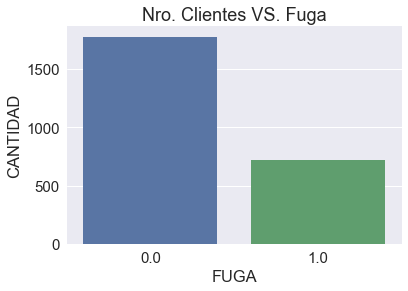

In [48]:
sns.countplot(base_mov_transf["FUGA"])
base_mov_transf["FUGA"].value_counts()
plt.ylabel("CANTIDAD")
plt.title("Nro. Clientes VS. Fuga")

FUGA                         1.000000
DESV_INDICADOR_MORA          0.325036
ULT_INDICADOR_MORA           0.299744
MEDIA_INDICADOR_MORA         0.273748
DESV_SALDO_FONDOS            0.025458
DESV_SALDO_CREDITO2         -0.032483
DESV_MONTO_CAJERO2          -0.039791
DESV_MONTO_ABONOS_NOMINA    -0.049840
MEDIA_SALDO_FONDOS          -0.049901
ULT_MONTO_COMPRAS1          -0.073983
DESV_SALDO_PASIVO           -0.074001
ULT_SALDO_FONDOS            -0.074227
MEDIA_SALDO_CREDITO2        -0.074984
ULT_SALDO_CREDITO2          -0.075685
ULT_MONTO_CAJERO1           -0.076824
DESV_SALDO_TARJETA          -0.081444
DESV_SALDO_AHORROS          -0.081523
DESV_SALDO_CREDITO1         -0.087428
MEDIA_MONTO_COMPRAS1        -0.088912
MEDIA_MONTO_COMPRAS2        -0.097553
DESV_MONTO_COMPRAS2         -0.097989
DESV_MONTO_COMPRAS1         -0.097989
DESV_SALDO_ACTIVO           -0.100458
DESV_MONTO_CAJERO1          -0.104701
MEDIA_SALDO_TARJETA         -0.111715
MEDIA_MONTO_CAJERO1         -0.113429
MEDIA_SALDO_

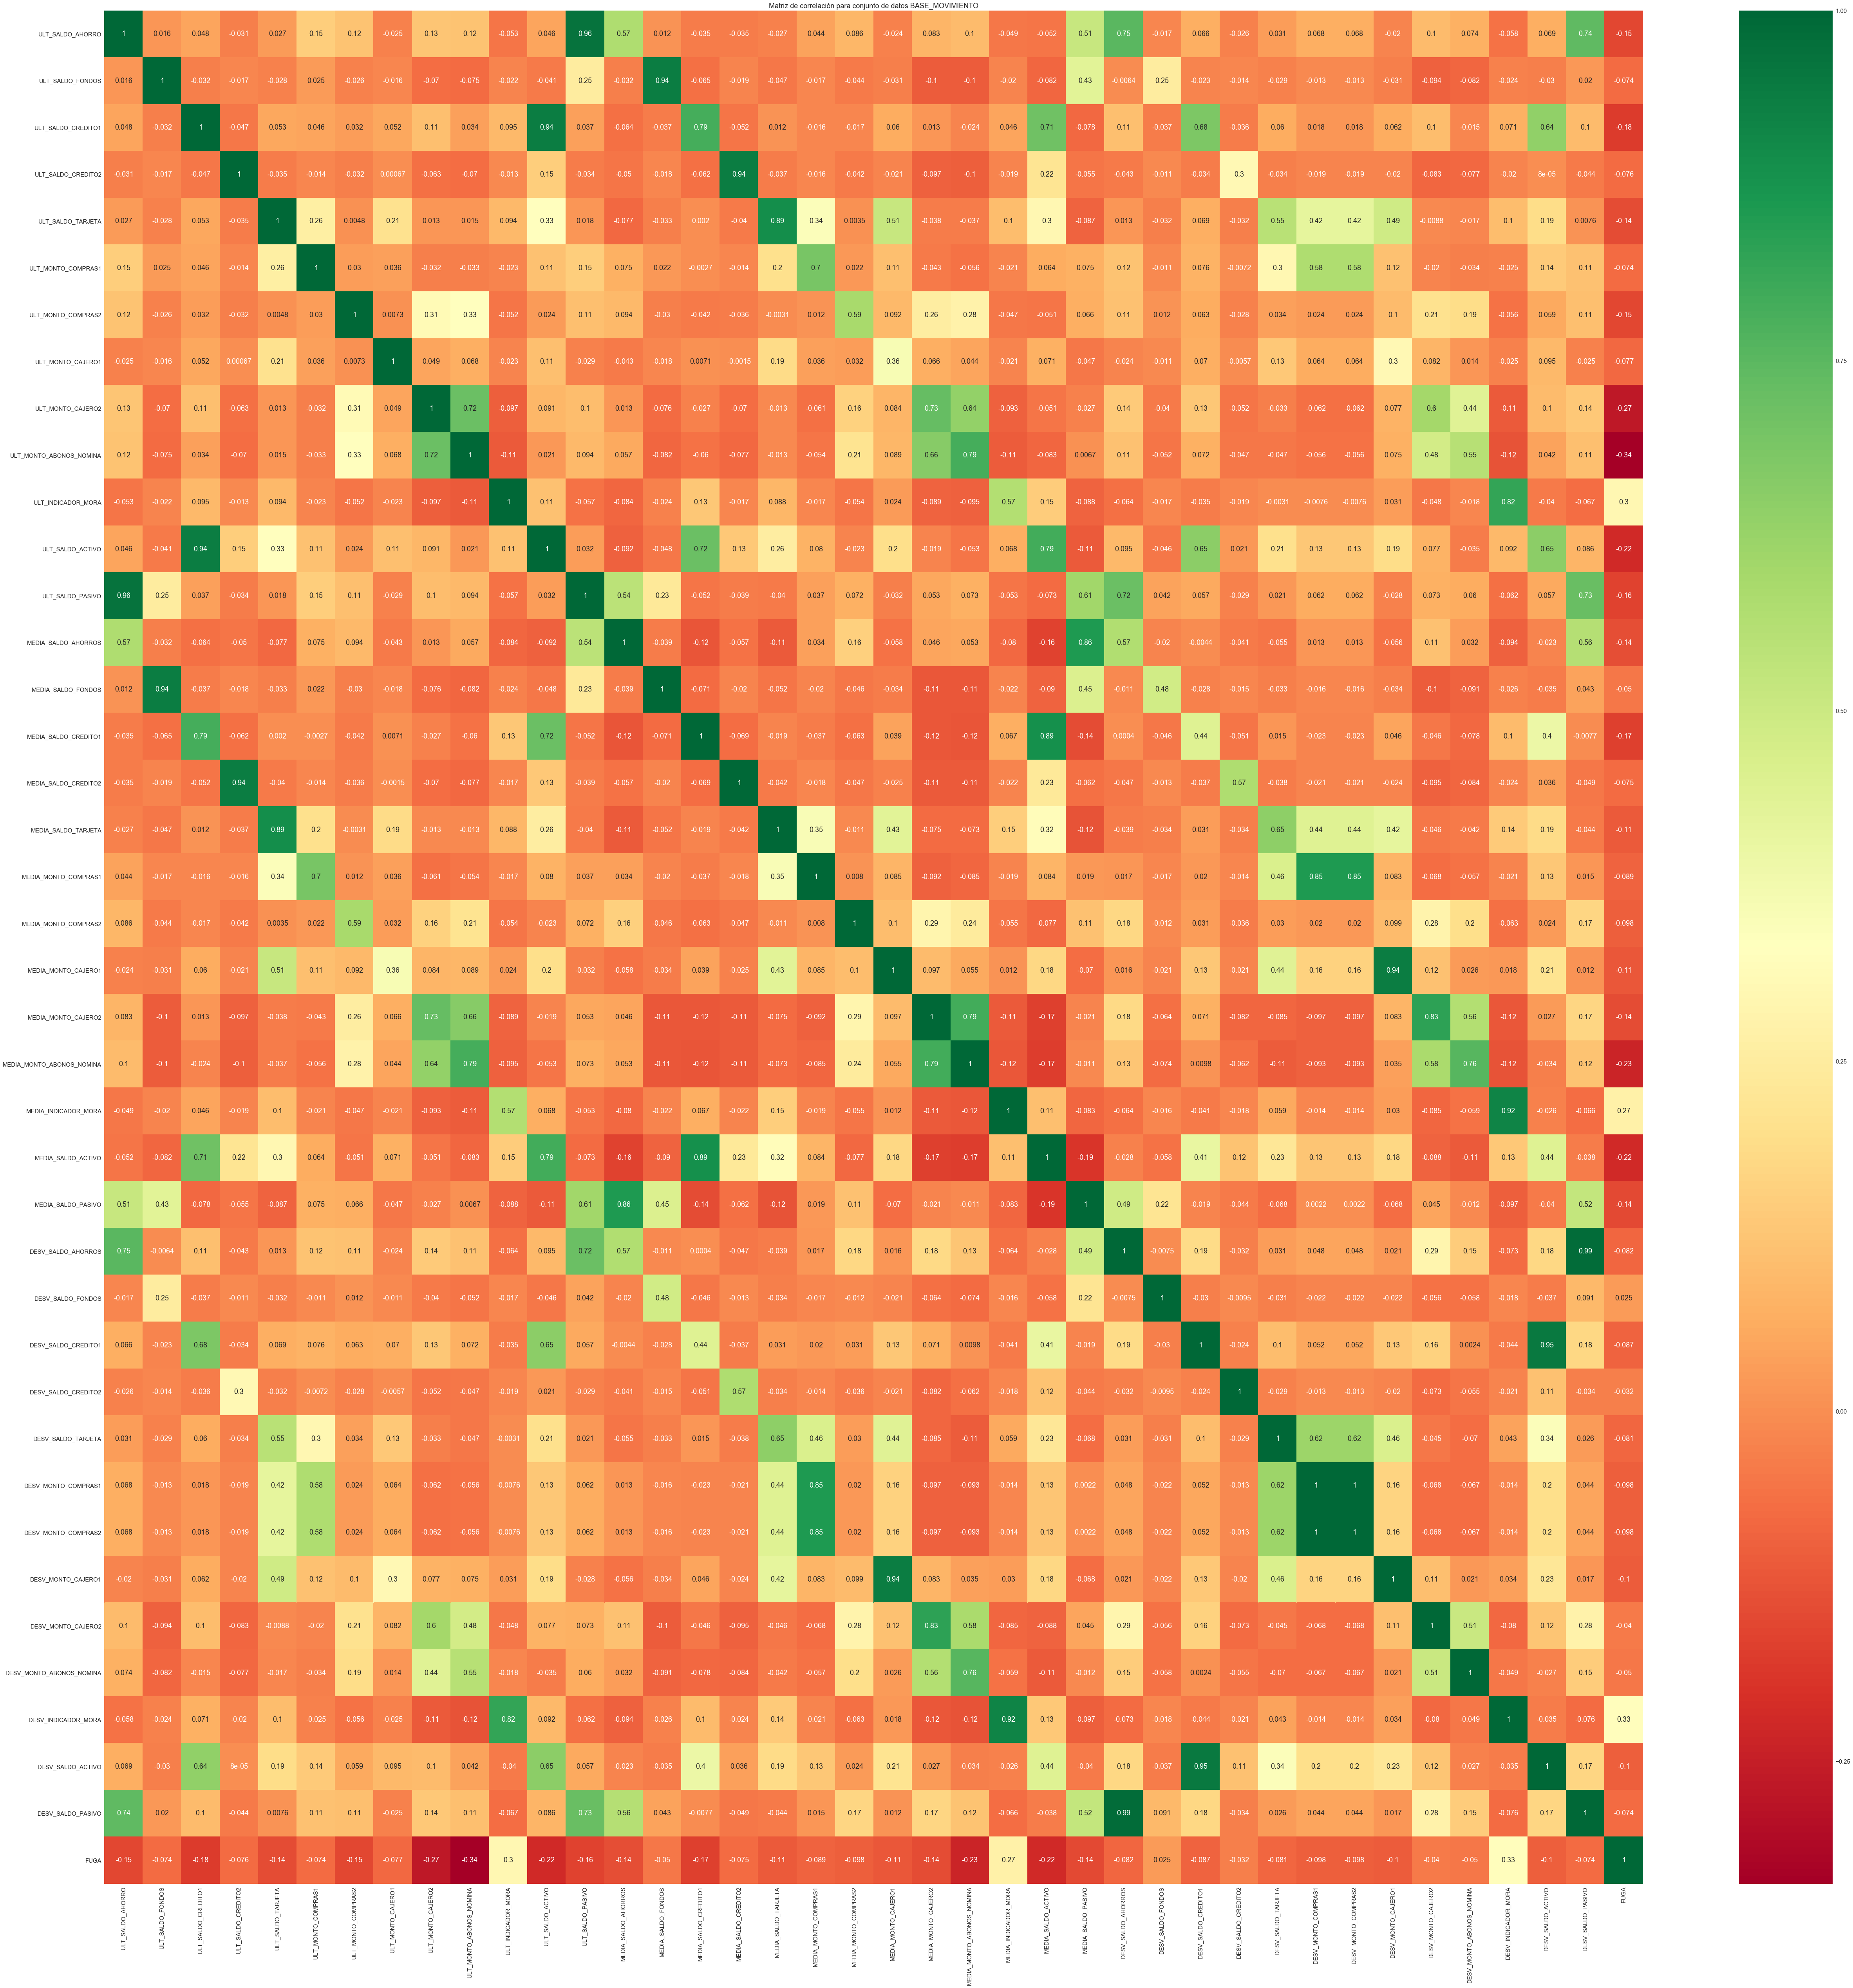

In [49]:

#Get correlations of each features in dataset
corrmat = base_mov_transf.corr()
print(corrmat["FUGA"].sort_values(ascending=False))
top_corr_features = corrmat.index
plt.figure(figsize=(88,88))
#Plot heat map
sns_heatmap=sns.heatmap(base_mov_transf[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Matriz de correlación para conjunto de datos BASE_MOVIMIENTO")
sns_heatmap.get_figure().savefig("base_mov_coor_mat.png")

count    2.500000e+03
mean     6.257987e+05
std      1.297121e+06
min      0.000000e+00
25%      8.660553e+03
50%      1.597264e+05
75%      5.762006e+05
max      1.026426e+07
Name: MEDIA_SALDO_AHORROS, dtype: float64

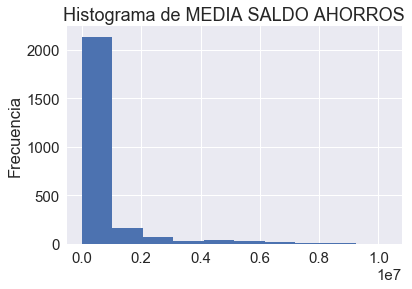

In [50]:
base_mov_transf["MEDIA_SALDO_AHORROS"].hist()
plt.title("Histograma de MEDIA SALDO AHORROS")
plt.ylabel("Frecuencia")
base_mov_transf["MEDIA_SALDO_AHORROS"].describe()

count    2.500000e+03
mean     6.038687e+05
std      1.570177e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.278904e+05
max      1.769428e+07
Name: MEDIA_SALDO_TARJETA, dtype: float64

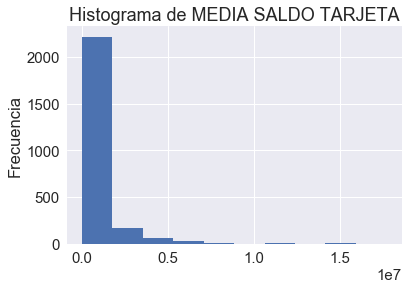

In [51]:
base_mov_transf["MEDIA_SALDO_TARJETA"].hist()
plt.title("Histograma de MEDIA SALDO TARJETA")
plt.ylabel("Frecuencia")
base_mov_transf["MEDIA_SALDO_TARJETA"].describe()

count    2.500000e+03
mean     2.943832e+06
std      4.504734e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.529961e+05
75%      4.504859e+06
max      2.215331e+07
Name: MEDIA_SALDO_ACTIVO, dtype: float64

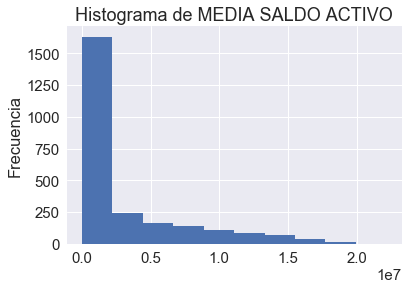

In [52]:
base_mov_transf["MEDIA_SALDO_ACTIVO"].hist()
plt.title("Histograma de MEDIA SALDO ACTIVO")
plt.ylabel("Frecuencia")
base_mov_transf["MEDIA_SALDO_ACTIVO"].describe()

Text(0,0.5,'Frecuencia')

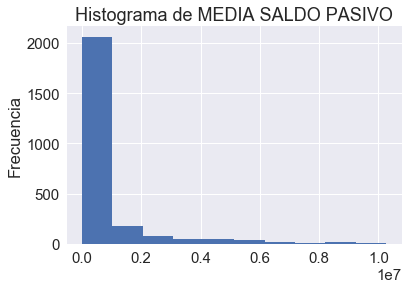

In [53]:
base_mov_transf["MEDIA_SALDO_PASIVO"].hist()
plt.title("Histograma de MEDIA SALDO PASIVO")
plt.ylabel("Frecuencia")

Text(0.5,1,'Histograma medias de saldos')

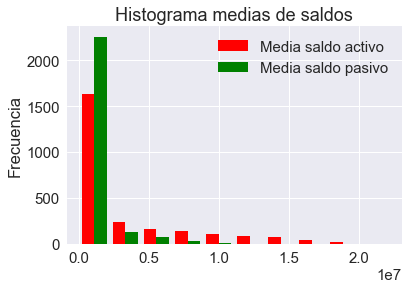

In [54]:
plt.hist([base_mov_transf["MEDIA_SALDO_ACTIVO"],base_mov_transf["MEDIA_SALDO_PASIVO"]],color=["Red","Green"])
plt.legend(['Media saldo activo', 'Media saldo pasivo'])
plt.ylabel("Frecuencia")
plt.title("Histograma medias de saldos")

Text(0.5,1,'Histograma medias de saldos activos y pasivos \npara clientes fuga')

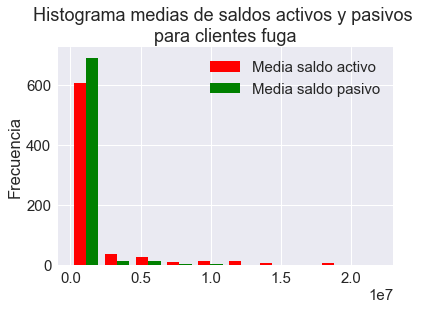

In [55]:
clientes_fuga=base_mov_transf.loc[base_mov_transf["FUGA"] == 1]
plt.hist([clientes_fuga["MEDIA_SALDO_ACTIVO"],clientes_fuga["MEDIA_SALDO_PASIVO"]],color=["Red","Green"])
plt.legend(['Media saldo activo', 'Media saldo pasivo'])
plt.ylabel("Frecuencia")
plt.title("Histograma medias de saldos activos y pasivos \npara clientes fuga")

Text(0.5,1,'Histograma medias de saldos de ahorros y fondos \npara clientes fuga')

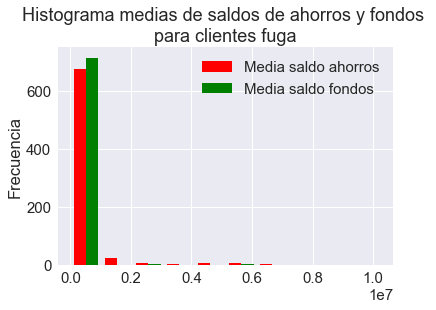

In [56]:
clientes_fuga=base_mov_transf.loc[base_mov_transf["FUGA"] == 1]
plt.hist([clientes_fuga["MEDIA_SALDO_AHORROS"],clientes_fuga["MEDIA_SALDO_FONDOS"]],color=["Red","Green"])
plt.legend(['Media saldo ahorros', 'Media saldo fondos'])
plt.ylabel("Frecuencia")
plt.title("Histograma medias de saldos de ahorros y fondos \npara clientes fuga")

Text(0.5,1,'Histograma medias de saldos de credito 1 y credito 2 \npara clientes fuga')

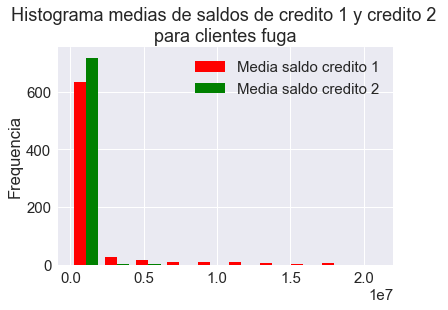

In [57]:
clientes_fuga=base_mov_transf.loc[base_mov_transf["FUGA"] == 1]
plt.hist([clientes_fuga["MEDIA_SALDO_CREDITO1"],clientes_fuga["MEDIA_SALDO_CREDITO2"]],color=["Red","Green"])
plt.legend(['Media saldo credito 1', 'Media saldo credito 2'])
plt.ylabel("Frequencia")
plt.title("Histograma medias de saldos de credito 1 y credito 2 \npara clientes fuga")


count    7.220000e+02
mean     4.303434e+05
std      5.386273e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.053962e+05
max      2.683595e+06
Name: MEDIA_MONTO_ABONOS_NOMINA, dtype: float64

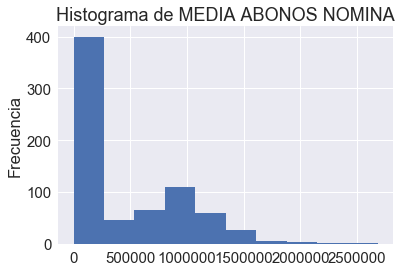

In [58]:
clientes_fuga=base_mov_transf.loc[base_mov_transf["FUGA"] == 1]
clientes_fuga["MEDIA_MONTO_ABONOS_NOMINA"].hist()
plt.title("Histograma de MEDIA ABONOS NOMINA")
plt.ylabel("Frecuencia")
clientes_fuga["MEDIA_MONTO_ABONOS_NOMINA"].describe()

In [59]:
#Number of FUGA clients with MEDIA_MONTO_ABONOS_NOMINA below than 300000
n=clientes_fuga.loc[clientes_fuga["MEDIA_MONTO_ABONOS_NOMINA"] <300000]["FUGA"].count()
print("Number of FUGA clients with MEDIA_MONTO_ABONOS_NOMINA below than 300000: ", 450)
print("% of FUGA clients with MEDIA_MONTO_ABONOS_NOMINA below than 300000: ", 450/722*100,"%")

Number of FUGA clients with MEDIA_MONTO_ABONOS_NOMINA below than 300000:  450
% of FUGA clients with MEDIA_MONTO_ABONOS_NOMINA below than 300000:  62.32686980609419 %


count    722.000000
mean       0.032766
std        0.097151
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.600000
Name: MEDIA_INDICADOR_MORA, dtype: float64

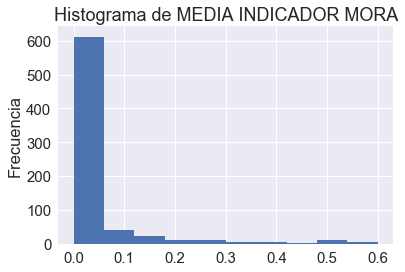

In [60]:
clientes_fuga=base_mov_transf.loc[base_mov_transf["FUGA"] == 1]
clientes_fuga["MEDIA_INDICADOR_MORA"].hist()
plt.title("Histograma de MEDIA INDICADOR MORA")
plt.ylabel("Frecuencia")
clientes_fuga["MEDIA_INDICADOR_MORA"].describe()

# Building classifiers for FUGA clients

In [61]:
#Importing required libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np
from sklearn.model_selection import train_test_split

In [62]:
#Split 'ULT_FECHA' column in 3 columns: ANIO_ULT_FECHA, MES_ULT_FECHA,DIA_ULT_FECHA
date=base_mov_transf["ULT_FECHA"]
#base_mov_transf["ANIO_ULT_FECHA"],base_mov_transf["MES_ULT_FECHA"],base_mov_transf["DIA_ULT_FECHA"] = date.dt.year, date.dt.month, date.dt.day
base_mov_transf["MES_ULT_FECHA"],base_mov_transf["DIA_ULT_FECHA"] =  date.dt.month, date.dt.day
base_mov_transf=base_mov_transf.drop(["ULT_FECHA"],axis=1)
base_mov_transf.head(5)

,ULT_SALDO_AHORRO,ULT_SALDO_FONDOS,ULT_SALDO_CREDITO1,ULT_SALDO_CREDITO2,ULT_SALDO_TARJETA,ULT_MONTO_COMPRAS1,ULT_MONTO_COMPRAS2,ULT_MONTO_CAJERO1,ULT_MONTO_CAJERO2,ULT_MONTO_ABONOS_NOMINA,...,DESV_MONTO_COMPRAS2,DESV_MONTO_CAJERO1,DESV_MONTO_CAJERO2,DESV_MONTO_ABONOS_NOMINA,DESV_INDICADOR_MORA,DESV_SALDO_ACTIVO,DESV_SALDO_PASIVO,FUGA,MES_ULT_FECHA,DIA_ULT_FECHA
ID,,,,,,,,,,,,,,,,,,,,,
1,5507.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,848.855007,1.0,2,1
2,0.0,0.0,2584011.62,0.0,506015.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,1.667607e+06,0.000000,0.0,12,1
3,3340.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,8.802479e+05,0.000000,1.0,11,1
4,1062140.0,0.0,0.00,0.0,0.0,0.0,430783.0,0.0,1610000.0,2368510.0,...,0.0,0.0,914854.619248,830185.780506,0.0,0.000000e+00,276506.453885,0.0,12,1
5,12293.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,72771.966479,0.0,12,1


In [63]:
base_id_transf=base_id_transf.reset_index()
base_id_transf["ID"]=list(base_mov_transf.index.values)
base_id_transf=base_id_transf.drop(["CLIENTE_CC"],axis=1)
base_id_transf=base_id_transf.set_index("ID")
base_id_transf.head(5)

,FUGA,MES_DE_FUGA,ANIO_ALTA,MES_ALTA,DIA_ALTA,ANIO_NACIMIENTO,MES_NACIMIENTO,DIA_NACIMIENTO,SEXO_F,SEXO_M,...,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,SITUACION_LABORAL_CONTRATO AUTONOMO,SITUACION_LABORAL_CONTRATO FIJO,SITUACION_LABORAL_CONTRATO TEMPORAL,SITUACION_LABORAL_DESCONOCIDO,SITUACION_LABORAL_OTROS,SITUACION_LABORAL_SIN CLASIFICAR
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,1996,9,30,1930,8,23,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,1986,5,1,1953,6,30,0,1,...,0,0,1,0,0,1,0,0,0,0
3,1.0,11.0,1994,12,1,1954,7,21,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,0.0,1997,8,27,1939,5,3,0,1,...,0,0,0,0,0,0,0,0,1,0
5,0.0,0.0,1997,7,21,1931,10,13,1,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
#Inspection of dataframes
base_id_transf.info()
base_mov_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 22 columns):
FUGA                                   2500 non-null float64
MES_DE_FUGA                            2500 non-null float64
ANIO_ALTA                              2500 non-null int64
MES_ALTA                               2500 non-null int64
DIA_ALTA                               2500 non-null int64
ANIO_NACIMIENTO                        2500 non-null int64
MES_NACIMIENTO                         2500 non-null int64
DIA_NACIMIENTO                         2500 non-null int64
SEXO_F                                 2500 non-null uint8
SEXO_M                                 2500 non-null uint8
ESTADO_CIVIL_CASADO                    2500 non-null uint8
ESTADO_CIVIL_DIVORCIADO                2500 non-null uint8
ESTADO_CIVIL_SEPARADO                  2500 non-null uint8
ESTADO_CIVIL_SOLTERO                   2500 non-null uint8
ESTADO_CIVIL_UNION LIBRE               2500 non-null uint8
ESTA

### Dataframe with input data is created. BASE_MOV and BASE_ID datasets are mixed. 

In [65]:
#Input features - Union of base_mov_transf(Transformed BASE_MOVIMIENTO dataset) with base_id_transf(Transformed BASE_ID dataset) 
X = pd.concat([base_mov_transf.drop("FUGA",axis=1),base_id_transf.drop("FUGA",axis=1)], axis = 1,join_axes=[base_id_transf.index])
#MES_FUGA is dropped because is a value post FUGA
X=X.drop("MES_DE_FUGA",axis=1)

In [66]:
#Inspection of dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 61 columns):
ULT_SALDO_AHORRO                       2500 non-null float64
ULT_SALDO_FONDOS                       2500 non-null float64
ULT_SALDO_CREDITO1                     2500 non-null float64
ULT_SALDO_CREDITO2                     2500 non-null float64
ULT_SALDO_TARJETA                      2500 non-null float64
ULT_MONTO_COMPRAS1                     2500 non-null float64
ULT_MONTO_COMPRAS2                     2500 non-null float64
ULT_MONTO_CAJERO1                      2500 non-null float64
ULT_MONTO_CAJERO2                      2500 non-null float64
ULT_MONTO_ABONOS_NOMINA                2500 non-null float64
ULT_INDICADOR_MORA                     2500 non-null int64
ULT_SALDO_ACTIVO                       2500 non-null float64
ULT_SALDO_PASIVO                       2500 non-null float64
MEDIA_SALDO_AHORROS                    2500 non-null float64
MEDIA_SALDO_FONDOS                     25

In [67]:
#Inspection of dataframe
X.head(5)

,ULT_SALDO_AHORRO,ULT_SALDO_FONDOS,ULT_SALDO_CREDITO1,ULT_SALDO_CREDITO2,ULT_SALDO_TARJETA,ULT_MONTO_COMPRAS1,ULT_MONTO_COMPRAS2,ULT_MONTO_CAJERO1,ULT_MONTO_CAJERO2,ULT_MONTO_ABONOS_NOMINA,...,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,SITUACION_LABORAL_CONTRATO AUTONOMO,SITUACION_LABORAL_CONTRATO FIJO,SITUACION_LABORAL_CONTRATO TEMPORAL,SITUACION_LABORAL_DESCONOCIDO,SITUACION_LABORAL_OTROS,SITUACION_LABORAL_SIN CLASIFICAR
ID,,,,,,,,,,,,,,,,,,,,,
1,5507.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,2584011.62,0.0,506015.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,3340.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,1062140.0,0.0,0.00,0.0,0.0,0.0,430783.0,0.0,1610000.0,2368510.0,...,0,0,0,0,0,0,0,0,1,0
5,12293.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


### Dataframe with output values is created. Values from FUGA column are used to create the new dataframe.

In [68]:
#Output feature - FUGA column
y=base_id_transf["FUGA"]
y.head(5)

ID
1    1.0
2    0.0
3    1.0
4    0.0
5    0.0
Name: FUGA, dtype: float64

In [69]:
#Dataset description
print("Number of input features: ", X.shape[1])
print("Number of examples: ", X.shape[0])
print("Number of output: 1")
print("Number of classes on output: 2")
print("Class 1 : FUGA client")
print("Class 0 : non FUGA client")
print("Number of examples for training: ",X.shape[0]*0.7)
print("Number of examples for testing: ",X.shape[0]*0.3)

Number of input features:  61
Number of examples:  2500
Number of output: 1
Number of classes on output: 2
Class 1 : FUGA client
Class 0 : non FUGA client
Number of examples for training:  1750.0
Number of examples for testing:  750.0


## Firstly, 4 binary classifiers are built. All available features are used. 70% of data is used for training and 30% for testing.

In [70]:
from sklearn.preprocessing import StandardScaler

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

#Dataset is scaled to improve performance of several algorithms
scaled_X = StandardScaler().fit_transform(X)

#Splitting scaled dataset
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_X, y, stratify=y, test_size=0.3, random_state=0)

In [71]:
#Set number of folds for K-fold cross-validation
k=10

### Logistic regression classifier 

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'solver': ['saga', 'sag','lbfgs','liblinear','newton-cg']
             }

#Set logistic regression classifier. 
logistic_regression_clf = LogisticRegression()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(logistic_regression_clf, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

#Selection of the best combination of parameters
logistic_regression_clf = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
logistic_regression_clf.fit(X_train, y_train)

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
from sklearn import metrics

#Calc. predictions
predictions = logistic_regression_clf.predict(X_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test,predictions))

#Accuracy 
accuracy_lr=metrics.accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy_lr)

#Precision
precision_lr=metrics.precision_score(y_test,predictions)
print("Precision: ",precision_lr)

#Recall
recall_lr=metrics.recall_score(y_test,predictions)
print("Recall: ",recall_lr)

#F1 score
f1_lr=metrics.f1_score(y_test,predictions)
print("F1 score: ",f1_lr)

Confusion matrix
[[523  10]
 [ 30 187]]
Accuracy:  0.9466666666666667
Precision:  0.949238578680203
Recall:  0.8617511520737328
F1 score:  0.9033816425120773


### SVM classifier

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV 

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'kernel': ['rbf', 'linear','poly']
             }

#Set logistic regression classifier. 
svm_clf = SVC()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(svm_clf, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_scaled, y_train_scaled)

#Selection of the best combination of parameters
svm_clf = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
svm_clf.fit(X_train_scaled, y_train_scaled)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
from sklearn import metrics

#Calc. predictions
predictions = svm_clf.predict(X_test_scaled)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test_scaled,predictions))

#Accuracy 
accuracy_svm=metrics.accuracy_score(y_test_scaled,predictions)
print("Accuracy: ",accuracy_svm)

#Precision
precision_svm=metrics.precision_score(y_test_scaled,predictions)
print("Precision: ",precision_svm)

#Recall
recall_svm=metrics.recall_score(y_test_scaled,predictions)
print("Recall: ",recall_svm)

#F1 score
f1_svm=metrics.f1_score(y_test_scaled,predictions)
print("F1 score: ",f1_svm)

Confusion matrix
[[533   0]
 [ 12 205]]
Accuracy:  0.984
Precision:  1.0
Recall:  0.9447004608294931
F1 score:  0.9715639810426541


### MLP classifier

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 


#list with combinations of number of neurons  

    
#Parameter combinations
parameters = {
              'alpha': [1000,100,10,1,0.1,0.001,0.0001,0.00001,1e-5,1e-6]
             }

#Set Multi-layer perceptron classifier. 
mlp_clf = MLPClassifier(hidden_layer_sizes=(30,2))

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(mlp_clf, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

#Selection of the best combination of parameters
mlp_clf = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
mlp_clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:
from sklearn import metrics

#Calc. predictions
predictions = mlp_clf.predict(X_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test,predictions))

#Accuracy 
accuracy_mlp=metrics.accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy_mlp)

#Precision
precision_mlp=metrics.precision_score(y_test,predictions)
print("Precision: ",precision_mlp)

#Recall
recall_mlp=metrics.recall_score(y_test,predictions)
print("Recall: ",recall_mlp)

#F1 score
f1_mlp=metrics.f1_score(y_test,predictions)
print("F1 score: ",f1_mlp)

Confusion matrix
[[529   4]
 [214   3]]
Accuracy:  0.7093333333333334
Precision:  0.42857142857142855
Recall:  0.013824884792626729
F1 score:  0.026785714285714288


### Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
rf_clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(rf_clf, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

#Selection of the best combination of parameters
rf_clf = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
from sklearn import metrics

#Calc. predictions
predictions = rf_clf.predict(X_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test,predictions))

#Accuracy 
accuracy_rf=metrics.accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy_rf)

#Precision
precision_rf=metrics.precision_score(y_test,predictions)
print("Precision: ",precision_rf)

#Recall
recall_rf=metrics.recall_score(y_test,predictions)
print("Recall: ",recall_rf)

#F1 score
f1_rf=metrics.f1_score(y_test,predictions)
print("F1 score: ",f1_rf)

Confusion matrix
[[528   5]
 [  3 214]]
Accuracy:  0.9893333333333333
Precision:  0.9771689497716894
Recall:  0.9861751152073732
F1 score:  0.9816513761467889


## Resume for performance metrics

In [80]:
#Resume of metrics for classifiers

resume_clf=pd.DataFrame()
resume_clf["Classifier"]=["Log. Regression","Support Vector Machine","Multi-Layer Perceptron","Random Forest"]
resume_clf["Accuracy"]=[accuracy_lr,accuracy_svm,accuracy_mlp,accuracy_rf]
resume_clf["Precision"]=[precision_lr,precision_svm,precision_mlp,precision_rf]
resume_clf["Recall"]=[recall_lr,recall_svm,recall_mlp,recall_rf]
resume_clf["F1"]=[f1_lr,f1_svm,f1_mlp,f1_rf]

resume_clf.head(5)

,Classifier,Accuracy,Precision,Recall,F1
0,Log. Regression,0.946667,0.949239,0.861751,0.903382
1,Support Vector Machine,0.984000,1.000000,0.944700,0.971564
2,Multi-Layer Perceptron,0.709333,0.428571,0.013825,0.026786
3,Random Forest,0.989333,0.977169,0.986175,0.981651


## Secondly, another 4 binary classifiers are built. This time PCA is used. 70% of data is used for training and 30% for testing.

In [81]:
#Correlation matrix for dataset
temp_X=X.copy()
temp_X["FUGA"]=list(y)
corr_mat_x=temp_X.corr()
corr_mat_x["FUGA"].sort_values(ascending=False).head(10)

FUGA                                   1.000000
DESV_INDICADOR_MORA                    0.325036
ULT_INDICADOR_MORA                     0.299744
MEDIA_INDICADOR_MORA                   0.273748
ANIO_NACIMIENTO                        0.167605
ANIO_ALTA                              0.129415
SITUACION_LABORAL_CONTRATO TEMPORAL    0.114942
ESTADO_CIVIL_SOLTERO                   0.074677
SITUACION_LABORAL_CONTRATO FIJO        0.056095
SITUACION_LABORAL_CONTRATO AUTONOMO    0.034393
Name: FUGA, dtype: float64

### Feature selection

In [82]:
from sklearn.decomposition import PCA

X1 = X.copy()

#PCA is applied
pca=PCA(n_components=0.95)
X1=pca.fit_transform(X1)

print("Dimensionalty reduction with PCA")
print("New number of input features: ",X1.shape[1])

Dimensionalty reduction with PCA
New number of input features:  7


### Splitting reduced dataset. 70% to train and 30% to test

In [83]:
from sklearn.preprocessing import StandardScaler

#Splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, stratify=y, test_size=0.3, random_state=0)

#Dataset is scaled to improve performance of several algorithms
scaled_X1 = StandardScaler().fit_transform(X1)

#Splitting scaled dataset
X1_train_scaled, X1_test_scaled, y1_train_scaled, y1_test_scaled = train_test_split(scaled_X1, y, stratify=y, test_size=0.3, random_state=0)

In [84]:
#Set number of folds for K-fold cross-validation
k=10

### Logistic regression classifier 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'solver': ['saga', 'sag','lbfgs','liblinear','newton-cg']
             }

#Set logistic regression classifier. 
logistic_regression_clf1 = LogisticRegression()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(logistic_regression_clf1, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X1_train, y1_train)

#Selection of the best combination of parameters
logistic_regression_clf1 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
logistic_regression_clf1.fit(X1_train, y1_train)

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
from sklearn import metrics

#Calc. predictions
predictions = logistic_regression_clf1.predict(X1_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y1_test,predictions))

#Accuracy 
accuracy_lr=metrics.accuracy_score(y1_test,predictions)
print("Accuracy: ",accuracy_lr)

#Precision
precision_lr=metrics.precision_score(y1_test,predictions)
print("Precision: ",precision_lr)

#Recall
recall_lr=metrics.recall_score(y1_test,predictions)
print("Recall: ",recall_lr)

#F1 score
f1_lr=metrics.f1_score(y1_test,predictions)
print("F1 score: ",f1_lr)

Confusion matrix
[[466  67]
 [ 68 149]]
Accuracy:  0.82
Precision:  0.6898148148148148
Recall:  0.6866359447004609
F1 score:  0.6882217090069284


### SVM classifier

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV 

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'kernel': ['rbf', 'linear','poly']
             }

#Set logistic regression classifier. 
svm_clf1 = SVC()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(svm_clf1, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X1_train_scaled, y1_train_scaled)

#Selection of the best combination of parameters
svm_clf1 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
svm_clf1.fit(X1_train_scaled, y1_train_scaled)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
from sklearn import metrics

#Calc. predictions
predictions = svm_clf1.predict(X1_test_scaled)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y1_test_scaled,predictions))

#Accuracy 
accuracy_svm=metrics.accuracy_score(y1_test_scaled,predictions)
print("Accuracy: ",accuracy_svm)

#Precision
precision_svm=metrics.precision_score(y1_test_scaled,predictions)
print("Precision: ",precision_svm)

#Recall
recall_svm=metrics.recall_score(y1_test_scaled,predictions)
print("Recall: ",recall_svm)

#F1 score
f1_svm=metrics.f1_score(y1_test_scaled,predictions)
print("F1 score: ",f1_svm)

Confusion matrix
[[498  35]
 [ 45 172]]
Accuracy:  0.8933333333333333
Precision:  0.8309178743961353
Recall:  0.7926267281105991
F1 score:  0.8113207547169812


### MLP classifier

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 


#list with combinations of number of neurons  
hl=[(32,2),(30,2)]

for i in range(2,30):
    hl.append((i,2))
    
#Parameter combinations
parameters = {
              'alpha': [1000,100,10,1,0.1,0.001,0.0001,0.00001,1e-5,1e-6]
             }

#Set Multi-layer perceptron classifier. 
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(32,2))

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(mlp_clf1, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X1_train, y1_train)

#Selection of the best combination of parameters
mlp_clf1 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
mlp_clf1.fit(X1_train, y1_train)


MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [90]:
from sklearn import metrics

#Calc. predictions
predictions = mlp_clf1.predict(X1_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y1_test,predictions))

#Accuracy 
accuracy_mlp=metrics.accuracy_score(y1_test,predictions)
print("Accuracy: ",accuracy_mlp)

#Precision
precision_mlp=metrics.precision_score(y1_test,predictions)
print("Precision: ",precision_mlp)

#Recall
recall_mlp=metrics.recall_score(y1_test,predictions)
print("Recall: ",recall_mlp)

#F1 score
f1_mlp=metrics.f1_score(y1_test,predictions)
print("F1 score: ",f1_mlp)

Confusion matrix
[[531   2]
 [217   0]]
Accuracy:  0.708
Precision:  0.0
Recall:  0.0
F1 score:  0.0


### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
rf_clf1 = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(rf_clf1, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X1_train, y1_train)

#Selection of the best combination of parameters
rf_clf1 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
rf_clf1.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
from sklearn import metrics

#Calc. predictions
predictions = rf_clf1.predict(X1_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y1_test,predictions))

#Accuracy 
accuracy_rf=metrics.accuracy_score(y1_test,predictions)
print("Accuracy: ",accuracy_rf)

#Precision
precision_rf=metrics.precision_score(y1_test,predictions)
print("Precision: ",precision_rf)

#Recall
recall_rf=metrics.recall_score(y1_test,predictions)
print("Recall: ",recall_rf)

#F1 score
f1_rf=metrics.f1_score(y1_test,predictions)
print("F1 score: ",f1_rf)

Confusion matrix
[[512  21]
 [ 63 154]]
Accuracy:  0.888
Precision:  0.88
Recall:  0.7096774193548387
F1 score:  0.7857142857142856


## Resume for performance metrics

In [93]:
#Resume of metrics for classifiers

resume_clf1=pd.DataFrame()
resume_clf1["Classifier"]=["Log. Regression","Support Vector Machine","Multi-Layer Perceptron","Random Forest"]
resume_clf1["Accuracy"]=[accuracy_lr,accuracy_svm,accuracy_mlp,accuracy_rf]
resume_clf1["Precision"]=[precision_lr,precision_svm,precision_mlp,precision_rf]
resume_clf1["Recall"]=[recall_lr,recall_svm,recall_mlp,recall_rf]
resume_clf1["F1"]=[f1_lr,f1_svm,f1_mlp,f1_rf]

resume_clf1.head(5)

,Classifier,Accuracy,Precision,Recall,F1
0,Log. Regression,0.820000,0.689815,0.686636,0.688222
1,Support Vector Machine,0.893333,0.830918,0.792627,0.811321
2,Multi-Layer Perceptron,0.708000,0.000000,0.000000,0.000000
3,Random Forest,0.888000,0.880000,0.709677,0.785714


## Finally, another 4 binary classifiers are built. Univariate feature selection is used. 70% of data is used for training and 30% for testing.

In [94]:
#Correlation matrix for dataset
temp_X=X.copy()
temp_X["FUGA"]=list(y)
corr_mat_x=temp_X.corr()
corr_mat_x["FUGA"].sort_values(ascending=False).head(10)

FUGA                                   1.000000
DESV_INDICADOR_MORA                    0.325036
ULT_INDICADOR_MORA                     0.299744
MEDIA_INDICADOR_MORA                   0.273748
ANIO_NACIMIENTO                        0.167605
ANIO_ALTA                              0.129415
SITUACION_LABORAL_CONTRATO TEMPORAL    0.114942
ESTADO_CIVIL_SOLTERO                   0.074677
SITUACION_LABORAL_CONTRATO FIJO        0.056095
SITUACION_LABORAL_CONTRATO AUTONOMO    0.034393
Name: FUGA, dtype: float64

### Feature selection

In [95]:
from sklearn.feature_selection import VarianceThreshold

X2 = X.copy()

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit_transform(X2)

print("Dimensionality reduction with univariate feature selection")
X2=X2[X2.columns[sel.get_support(indices=True)]]
print("New number of input features: ",X2.shape[1])
X2.info()

Dimensionality reduction with univariate feature selection
New number of input features:  49
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 49 columns):
ULT_SALDO_AHORRO                   2500 non-null float64
ULT_SALDO_FONDOS                   2500 non-null float64
ULT_SALDO_CREDITO1                 2500 non-null float64
ULT_SALDO_CREDITO2                 2500 non-null float64
ULT_SALDO_TARJETA                  2500 non-null float64
ULT_MONTO_COMPRAS1                 2500 non-null float64
ULT_MONTO_COMPRAS2                 2500 non-null float64
ULT_MONTO_CAJERO1                  2500 non-null float64
ULT_MONTO_CAJERO2                  2500 non-null float64
ULT_MONTO_ABONOS_NOMINA            2500 non-null float64
ULT_SALDO_ACTIVO                   2500 non-null float64
ULT_SALDO_PASIVO                   2500 non-null float64
MEDIA_SALDO_AHORROS                2500 non-null float64
MEDIA_SALDO_FONDOS                 2500 non-null float64
ME

### Splitting reduced dataset. 70% to train and 30% to test

In [96]:
from sklearn.preprocessing import StandardScaler

#Splitting dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, stratify=y, test_size=0.3, random_state=0)

#Dataset is scaled to improve performance of several algorithms
scaled_X2 = StandardScaler().fit_transform(X2)

#Splitting scaled dataset
X2_train_scaled, X2_test_scaled, y2_train_scaled, y2_test_scaled = train_test_split(scaled_X2, y, stratify=y, test_size=0.3, random_state=0)

In [97]:
#Set number of folds for K-fold cross-validation
k=10

### Logistic regression classifier 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'solver': ['saga', 'sag','lbfgs','liblinear','newton-cg']
             }

#Set logistic regression classifier. 
logistic_regression_clf2 = LogisticRegression()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(logistic_regression_clf2, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X2_train, y2_train)

#Selection of the best combination of parameters
logistic_regression_clf2 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
logistic_regression_clf2.fit(X2_train, y2_train)

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LILI\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
from sklearn import metrics

#Calc. predictions
predictions = logistic_regression_clf2.predict(X2_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y2_test,predictions))

#Accuracy 
accuracy_lr=metrics.accuracy_score(y2_test,predictions)
print("Accuracy: ",accuracy_lr)

#Precision
precision_lr=metrics.precision_score(y2_test,predictions)
print("Precision: ",precision_lr)

#Recall
recall_lr=metrics.recall_score(y2_test,predictions)
print("Recall: ",recall_lr)

#F1 score
f1_lr=metrics.f1_score(y2_test,predictions)
print("F1 score: ",f1_lr)

Confusion matrix
[[521  12]
 [ 32 185]]
Accuracy:  0.9413333333333334
Precision:  0.9390862944162437
Recall:  0.8525345622119815
F1 score:  0.893719806763285


### SVM classifier

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV 

#Parameter combinations
parameters = {
              'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
              'kernel': ['rbf', 'linear','poly']
             }

#Set logistic regression classifier. 
svm_clf2 = SVC()

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(svm_clf2, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X2_train_scaled, y2_train_scaled)

#Selection of the best combination of parameters
svm_clf2 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
svm_clf2.fit(X2_train_scaled, y2_train_scaled)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
from sklearn import metrics

#Calc. predictions
predictions = svm_clf2.predict(X2_test_scaled)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y2_test_scaled,predictions))

#Accuracy 
accuracy_svm=metrics.accuracy_score(y2_test_scaled,predictions)
print("Accuracy: ",accuracy_svm)

#Precision
precision_svm=metrics.precision_score(y2_test_scaled,predictions)
print("Precision: ",precision_svm)

#Recall
recall_svm=metrics.recall_score(y2_test_scaled,predictions)
print("Recall: ",recall_svm)

#F1 score
f1_svm=metrics.f1_score(y2_test_scaled,predictions)
print("F1 score: ",f1_svm)

Confusion matrix
[[533   0]
 [ 18 199]]
Accuracy:  0.976
Precision:  1.0
Recall:  0.9170506912442397
F1 score:  0.9567307692307692


### MLP classifier

In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 


#list with combinations of number of neurons  
hl=[(32,2),(30,2)]

for i in range(2,30):
    hl.append((i,2))
    
#Parameter combinations
parameters = {
              'alpha': [1000,100,10,1,0.1,0.001,0.0001,0.00001,1e-5,1e-6]
             }

#Set Multi-layer perceptron classifier. 
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(32,2))

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


#Grid search
grid_obj = GridSearchCV(mlp_clf2, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X2_train, y2_train)

#Selection of the best combination of parameters
mlp_clf2 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
mlp_clf2.fit(X2_train, y2_train)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [103]:
from sklearn import metrics

#Calc. predictions
predictions = mlp_clf2.predict(X2_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y2_test,predictions))

#Accuracy 
accuracy_mlp=metrics.accuracy_score(y2_test,predictions)
print("Accuracy: ",accuracy_mlp)

#Precision
precision_mlp=metrics.precision_score(y2_test,predictions)
print("Precision: ",precision_mlp)

#Recall
recall_mlp=metrics.recall_score(y2_test,predictions)
print("Recall: ",recall_mlp)

#F1 score
f1_mlp=metrics.f1_score(y2_test,predictions)
print("F1 score: ",f1_mlp)

Confusion matrix
[[533   0]
 [217   0]]
Accuracy:  0.7106666666666667
Precision:  0.0
Recall:  0.0
F1 score:  0.0


### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
rf_clf2 = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

#Scoring to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Grid search
grid_obj = GridSearchCV(rf_clf2, parameters, cv=k,scoring=acc_scorer)
grid_obj = grid_obj.fit(X2_train, y2_train)

#Selection of the best combination of parameters
rf_clf2 = grid_obj.best_estimator_

#Fit the best algorithm to the data. 
rf_clf2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
from sklearn import metrics

#Calc. predictions
predictions = rf_clf2.predict(X2_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y2_test,predictions))

#Accuracy 
accuracy_rf=metrics.accuracy_score(y2_test,predictions)
print("Accuracy: ",accuracy_rf)

#Precision
precision_rf=metrics.precision_score(y2_test,predictions)
print("Precision: ",precision_rf)

#Recall
recall_rf=metrics.recall_score(y2_test,predictions)
print("Recall: ",recall_rf)

#F1 score
f1_rf=metrics.f1_score(y2_test,predictions)
print("F1 score: ",f1_rf)

Confusion matrix
[[531   2]
 [ 15 202]]
Accuracy:  0.9773333333333334
Precision:  0.9901960784313726
Recall:  0.9308755760368663
F1 score:  0.9596199524940617


## Resume of performance metrics 

In [106]:
#Resume of metrics for classifiers

resume_clf2=pd.DataFrame()
resume_clf2["Classifier"]=["Log. Regression","Support Vector Machine","Multi-Layer Perceptron","Random Forest"]
resume_clf2["Accuracy"]=[accuracy_lr,accuracy_svm,accuracy_mlp,accuracy_rf]
resume_clf2["Precision"]=[precision_lr,precision_svm,precision_mlp,precision_rf]
resume_clf2["Recall"]=[recall_lr,recall_svm,recall_mlp,recall_rf]
resume_clf2["F1"]=[f1_lr,f1_svm,f1_mlp,f1_rf]

resume_clf2.head(5)

,Classifier,Accuracy,Precision,Recall,F1
0,Log. Regression,0.941333,0.939086,0.852535,0.893720
1,Support Vector Machine,0.976000,1.000000,0.917051,0.956731
2,Multi-Layer Perceptron,0.710667,0.000000,0.000000,0.000000
3,Random Forest,0.977333,0.990196,0.930876,0.959620


# Fine-tune the model using ensemble methods

## Hard voting classifier using models without feature selection

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                            estimators=[('lr',logistic_regression_clf),('svm',svm_clf),("mlp",mlp_clf),("rf",rf_clf)],
                            voting="hard"
)

#Fit the ensemble to the data. 
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

#Calc. predictions
predictions = voting_clf.predict(X_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test,predictions))

#Accuracy 
accuracy_vot=metrics.accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy_vot)

#Precision
precision_vot=metrics.precision_score(y_test,predictions)
print("Precision: ",precision_vot)

#Recall
recall_vot=metrics.recall_score(y_test,predictions)
print("Recall: ",recall_vot)

#F1 score
f1_vot=metrics.f1_score(y_test,predictions)
print("F1 score: ",f1_vot)

## Hard voting classifier using models with PCA

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(
                            estimators=[('lr',logistic_regression_clf1),('svm',svm_clf1),("mlp",mlp_clf1),("rf",rf_clf1)],
                            voting="hard"
)

#Fit the ensemble to the data. 
voting_clf1.fit(X1_train, y1_train)

In [ ]:
from sklearn import metrics

#Calc. predictions
predictions = voting_clf1.predict(X1_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y1_test,predictions))

#Accuracy 
accuracy_vot1=metrics.accuracy_score(y1_test,predictions)
print("Accuracy: ",accuracy_vot1)

#Precision
precision_vot1=metrics.precision_score(y1_test,predictions)
print("Precision: ",precision_vot1)

#Recall
recall_vot1=metrics.recall_score(y1_test,predictions)
print("Recall: ",recall_vot1)

#F1 score
f1_vot1=metrics.f1_score(y1_test,predictions)
print("F1 score: ",f1_vot1)

## Hard voting classifier using models with univariate feature selection

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf2 = VotingClassifier(
                            estimators=[('lr',logistic_regression_clf2),('svm',svm_clf2),("mlp",mlp_clf2),("rf",rf_clf2)],
                            voting="hard"
)

#Fit the ensemble to the data. 
voting_clf2.fit(X2_train, y2_train)

In [ ]:
from sklearn import metrics

#Calc. predictions
predictions = voting_clf2.predict(X2_test)

#Performance metrics

#Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y2_test,predictions))

#Accuracy 
accuracy_vot2=metrics.accuracy_score(y2_test,predictions)
print("Accuracy: ",accuracy_vot2)

#Precision
precision_vot2=metrics.precision_score(y2_test,predictions)
print("Precision: ",precision_vot2)

#Recall
recall_vot2=metrics.recall_score(y2_test,predictions)
print("Recall: ",recall_vot2)

#F1 score
f1_vot2=metrics.f1_score(y2_test,predictions)
print("F1 score: ",f1_vot2)'''

## Resume of performance metrics 

In [ ]:
#Resume of metrics for classifiers

resume_clf3=pd.DataFrame()
resume_clf3["Classifier"]=["Voting model without f. s.","Voting model PCA","Voting model onevariate"]
resume_clf3["Accuracy"]=[accuracy_vot,accuracy_vot1,accuracy_vot2]
resume_clf3["Precision"]=[precision_vot,precision_vot1,precision_vot2]
resume_clf3["Recall"]=[recall_vot,recall_vot1,recall_vot2]
resume_clf3["F1"]=[f1_vot,f1_vot1,f1_vot2]

resume3_clf.head(5)